# Flow Matching for Generative Modeling

**Source Paper**: ["Flow Matching for Generative Modeling" by Lipman et al. (2023)](https://arxiv.org/abs/2210.02747)

# Continuous Normalizing Flows (CNF)

Let $\R^d$ denote the data space with data points $x=(x^1,\ldots,x^d) \in \R^d$.

**Probability density path** $p:[0,1]\times \R^d \to \R_{>0}$ a time dependent probability density function such as $\int p_t(x)dx = 1$.

**Time-dependent vector field** $v:[0,1]\times \R^d \to \R^d$ a time dependent vector field.

**Flow** $\phi:[0,1]\times \R^d \to \R^d$ a time-dependent diffeomorphic map defined via the ordinary differential equation (ODE):
\begin{align}
    \frac{d}{dt}\phi_t(x) &= v_t(\phi_t(x)) \\
    \phi_0(x) &= x
\end{align}


**Continuous Normalizing Flow** : A deep parametric model of the flow $\phi_t$ by modeling the vector field $v_t(x;\theta)$, where $\theta\in \R^p$ are its learnable parameters.

**Push-forward**: $v_t$ generate a probability density path $p_t$ (reshapes $p_0$ to $p_1$) if its flow $\phi_t$ satisfies this equation :
\begin{align}
p_t = p_0(\phi_t^{-1}(x))\det \left[ \frac{\partial \phi_t^{-1}}{\partial x}(x)\right]
\end{align}

# Flow Matching

Let $x_1$ denote a random variable distributed according to some unknown data distribution $q(x_1)$ from which we only have access to data samples.

Let $p_t$ be a probability path such that $p_0=p$ is a the standard normal distribution $p(x) = \mathcal{N}(x | 0, I)$, and $p_1(x) \approx q(x)$.

**Flow Matching (FM) objective** : 
\begin{equation}
    \mathcal{L}_{\text{FM}}(\theta) = \mathbb{E}_{t \sim \mathcal{U}[0,1],x\sim p_t(x)}\| v_t(x)-u_t(x) \|^2
\end{equation}

$\theta$ : the learnable parameters of $v_t$.

## Conditional Flow Matching

First, we construct $p_t$ and $u_t$ since we do not have access to them.

Let  $p_t(x|x_1)$ be a **conditional probability path** such that $p_0(x|x_1) = p(x)$ and $p_1(x|x_1) = \mathcal{N}(x | x_1, \sigma^2I)$.

The marginal probability $p_t(x)$ is given by $p_t(x) = \int p_t(x|x_1) q(x_1) dx_1$.

To find $u_t(x)$, we derive $p_t(x)$ with respect to $t$ and apply the continuity equation ($\frac{\partial p_t(x)}{\partial t} + \nabla \cdot \left[ u_t(x) p_t(x) \right] = 0$):
\begin{align}
\frac{\partial p_t(x)}{\partial t} &= \int \frac{\partial p_t(x|x_1)}{\partial t} q(x_1) \, dx_1 \\
&= -\nabla \cdot \left[ \int u_t(x|x_1) p_t(x|x_1) q(x_1) \, dx_1 \right] \\
u_t(x) p_t(x) &= \int u_t(x|x_1) p_t(x|x_1) q(x_1) \, dx_1 \\
u_t(x) &= \int u_t(x|x_1) \frac{p_t(x|x_1) q(x_1)}{p_t(x)} \, dx_1 \\
\end{align}

\begin{align}
    \mathcal{L}_{\text{FM}}(\theta) &= \mathbb{E}_{t \sim \mathcal{U}[0,1],x\sim p_t(x)}\| v_t(x)-u_t(x) \|^2 \\
    &= \mathbb{E}_{t \sim \mathcal{U}[0,1],x\sim p_t(x)}\left[ \|v_t(x)\|^2 - 2.v_t(x).u_t(x) + \|u_t(x)\|^2 \right] \\

\end{align}


\begin{align}
    \mathbb{E}_{t \sim \mathcal{U}[0,1],x\sim p_t(x)}\left[ \|2.v_t(x).u_t(x) \right] &= 2 \int{v_t(x).u_t(x).p_t(x)dx} \\
    &= 2 \int{v_t(x). \frac{\int u_t(x|x_1) p_t(x|x_1) q(x_1)dx_1}{p_t(x)} .p_t(x)dx} \\
    &= 2 \int{\int v_t(x).u_t(x|x_1) p_t(x|x_1) q(x_1)dx_1dx} \\
    &= 2 . \mathbb{E}_{x \sim p_t(x|x_1), x_1 \sim q(x_1)}\left[ \ v_t(x).u_t(x|x_1) \right] \\
\end{align}

\begin{align}
    \mathcal{L}_{\text{FM}}(\theta) &= \mathbb{E}_{t \sim \mathcal{U}[0,1],x\sim p_t(x)}\left[ \|v_t(x)\|^2 - 2.v_t(x).u_t(x) + \|u_t(x)\|^2 \right] \\
    &= \mathbb{E}_{x\sim p_t(x|x_1), x_1 \sim q(x_1)}\left[ \|v_t(x)\|^2 - 2.v_t(x).u_t(x|x_1) + \|u_t(x|x_1)\|^2 + \|u_t(x)\|^2  - \|u_t(x|x_1)\|^2 \right] \\
    &= \mathbb{E}_{x\sim p_t(x|x_1), x_1 \sim q(x_1)}\left[ \|v_t(x) - u_t(x|x_1)\|^2 + \|u_t(x)\|^2  - \|u_t(x|x_1)\|^2 \right] \\
\end{align}

Since $u_t(x)$ does not have any impact on the weights, we can rewrite the FM objective as :
\begin{align}
    \mathcal{L}_{\text{CFM}}(\theta) &= \mathbb{E}_{x\sim p_t(x|x_1), x_1 \sim q(x_1)}\left[ \|v_t(x) - u_t(x|x_1)\|^2 \right]
\end{align}



### Optimal Transport (OT)
We consider the flow : $\psi_t(x_0) = \sigma_t(x_1)x_0 + \mu_t(x_1)$ with $u_t(x_1) = tx_1$ and $\sigma_t(x_1) = 1 - t$.

We differentiate : 
\begin{align}
    \frac{\partial}{\partial t} \psi_t(x_0) &= \frac{\partial}{\partial t} ((1-t)x_0 + tx_1) \\
    &= \frac{\partial}{\partial t} (x_0 - tx_0 + tx_1)\\
    &= x_1 - x_0\\
\end{align}


We recall : $\frac{\partial}{\partial t} \psi_t(x_0) = u(\psi_t(x_0) | x_1)$

We can now rewrite the objective as :
\begin{align}
    \mathcal{L}_{\text{CFM}}(\theta) &= \mathbb{E}_{x_0\sim p_0(x_0), x_1 \sim q(x_1)}\left[ \|v_t(\psi_t(x_0)) - \frac{\partial}{\partial t} \psi_t(x_0)  \|^2 \right] \\
    &= \mathbb{E}_{x_0\sim p_0(x_0), x_1 \sim q(x_1)}\left[ \|v_t(\psi_t(x_0)) - (x_1 - x_0) \|^2 \right]
\end{align}

We then just need to train a neural network $v_\theta(x, t)$ to approximate the target vector field.

# Implementation

We now show an implementation of the demonstrated flow matching algorithm.

## Data

Data shape: (10000, 2)
Plot saved to checkerboard_data.png


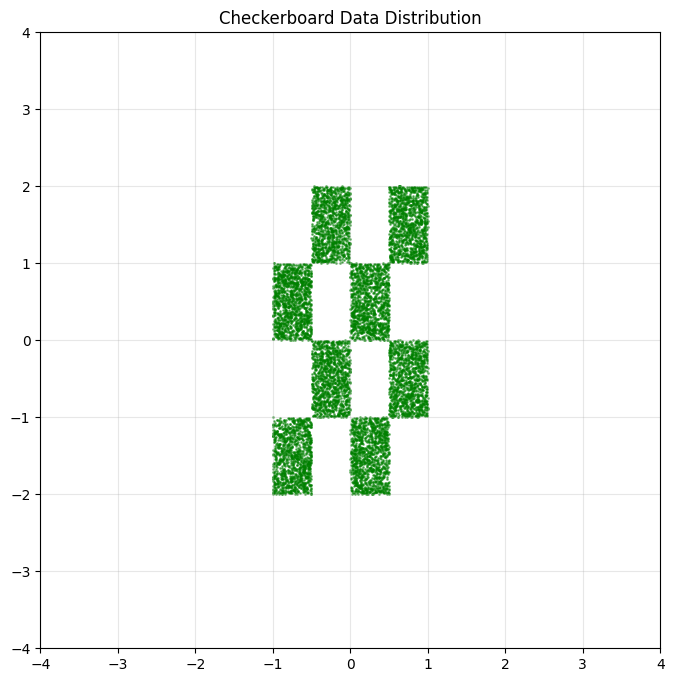

In [1]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

BATCH_SIZE = 128
NUM_WORKERS = 4

def get_checkerboard(n_samples: int = 10000) -> TensorDataset:
    """
    Generate a checkerboard dataset.
    """
    x1 = np.random.rand(n_samples) * 4 - 2
    x2_ = np.random.rand(n_samples) - np.random.randint(0, 2, n_samples) * 2
    x2 = x2_ + (np.floor(x1) % 2)
    dataset = np.stack([x1, x2 * 2], axis=1).astype("float32")
    # Normalize to be centered and scaled
    dataset = dataset / 2.0
    return TensorDataset(torch.from_numpy(dataset))

dataset = get_checkerboard()
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

data = dataset.tensors[0].numpy()
print(f"Data shape: {data.shape}")

plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], s=1, alpha=0.5, color='green')
plt.title("Checkerboard Data Distribution")
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid(True, alpha=0.3)

output_file = "checkerboard_data.png"
plt.savefig(output_file)
print(f"Plot saved to {output_file}")

## Model

We use a simple MLP with time embeddings to model the vector field $v_t(x;\theta)$.

$$
\text{Emb}(t)_k = 
\begin{cases} 
\sin\left( t \cdot 10000^{-k/h} \right) & \text{si } 0 \leq k < h \\
\cos\left( t \cdot 10000^{-(k-h)/h} \right) & \text{si } h \leq k < 2h
\end{cases}
$$
with $h = \lfloor \text{dim} / 2 \rfloor$.

In [2]:
import torch
import torch.nn as nn
import numpy as np

class TimeEmbedding(nn.Module):
    """
    Sinusoidal Time embedding
    """
    def __init__(self, dim: int, max_period=10000) -> None:
        super().__init__()
        self.dim = dim
        self.half_dim = dim // 2 # Half for sin and half for cos
        self.inv_freq = torch.exp(
            torch.arange(start=0 , end=self.half_dim, dtype=torch.float32) * (-np.log(max_period) / self.half_dim)
        )

    def forward(self, t: torch.Tensor) -> torch.Tensor:
        # t: (batch_size, 1) or (batch_size,)
        if t.dim() == 1:
            t = t.unsqueeze(-1)
        
        self.inv_freq = self.inv_freq.to(t.device)
        # sin/cos embedding
        # (B, 1) * (1, half_dim) -> (B, half_dim)
        sinusoid_inp = t * self.inv_freq.unsqueeze(0)
        emb = torch.cat((sinusoid_inp.sin(), sinusoid_inp.cos()), dim=-1)
        if self.dim % 2:
            emb = torch.cat([emb, torch.zeros_like(emb[:, :1])], dim=-1)
        return emb

class MLP(nn.Module):
    """
    Simple Time-Dependent MLP.
    Concatenates input x and time embedding of t.
    """
    def __init__(self, input_dim: int, hidden_dim: int = 128, time_dim: int = 32):
        super().__init__()

        self.time_layer = TimeEmbedding(time_dim)
        self.mlp = nn.Sequential(
            nn.Linear(input_dim + time_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, input_dim)
        )

    def forward(self, x: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        x: (B, D)
        t: (B, 1) or (B,)
        """
        if t.dim() == 1:
            t = t.unsqueeze(-1)
            
        t_emb = self.time_layer(t) # (B, H)
        return self.mlp(torch.cat([x, t_emb], dim=-1))

model = MLP(input_dim=2, hidden_dim=64, time_dim=32)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

## CFM Training

We follow this objective :

\begin{align}
    \mathcal{L}_{\text{CFM}}(\theta) &= \mathbb{E}_{x_0\sim p_0(x_0), x_1 \sim q(x_1)}\left[ \|v_t(\psi_t(x_0)) - (x_1 - x_0) \|^2 \right]
\end{align}

In each training step:
1. Sample data batch $x_1 \sim q(x_1)$.
2. Sample noise batch $x_0 \sim \mathcal{N}(0, I)$.
3. Sample times $t \sim U[0, 1]$.
4. Compute interpolation: $x_t = (1-t)x_0 + t x_1$.
5. Compute target vector: $u_t = x_1 - x_0$.
6. Predict vector: $v = \text{Model}(x_t, t)$.
7. Gradient step on MSE loss.

In [3]:
from tqdm import tqdm
from torch.functional import F
EPOCHS = 1000
model.train()

device = torch.device("mps" if torch.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.train()

for epoch in range(EPOCHS):
    total_loss = 0
    dataset = tqdm(
        dataloader, desc=f"Epoch {epoch+1}/{EPOCHS}"
    )
    for batch in dataset:
        x_1 = batch[0]
        y = None

        x_1 = x_1.to(device)

        optimizer.zero_grad()
        b = x_1.shape[0]

        x_0 = torch.randn_like(x_1)  # Gaussian noise x_0
        t = torch.rand((b, 1), device=device)  # uniform t

        # Conditional flow (OT Path)
        # xt = (1-t)*x_0 + t*x_1
        # Expand t to match x dimensions for broadcasting
        t_expanded = t.view(b, *([1] * (x_1.dim() - 1)))
        x_t = (1 - t_expanded) * x_0 + t_expanded * x_1

        # Vector field u_t (derivative of x_t w.r.t t)
        u_t = x_1 - x_0

        if y is not None:
            v_t = model(x_t, t.squeeze(-1), y=y)
        else:
            v_t = model(x_t, t.squeeze(-1))

        loss = F.mse_loss(v_t, u_t)  # regression

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        dataset.set_postfix({"loss": loss.item()})

    avg_loss = total_loss / len(dataloader)
    print(f"Epoch {epoch+1} Average Loss: {avg_loss:.6f}")

torch.save(model.state_dict(), "demo_FM_model.pth")

Epoch 1/1000:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1/1000: 100%|██████████| 79/79 [00:01<00:00, 69.73it/s, loss=2.02] 


Epoch 1 Average Loss: 1.755548


Epoch 2/1000: 100%|██████████| 79/79 [00:00<00:00, 82.81it/s, loss=1.55] 


Epoch 2 Average Loss: 1.684301


Epoch 3/1000: 100%|██████████| 79/79 [00:00<00:00, 80.65it/s, loss=1.5]  


Epoch 3 Average Loss: 1.672709


Epoch 4/1000: 100%|██████████| 79/79 [00:00<00:00, 85.22it/s, loss=1.62] 


Epoch 4 Average Loss: 1.675638


Epoch 5/1000: 100%|██████████| 79/79 [00:00<00:00, 83.49it/s, loss=0.565] 


Epoch 5 Average Loss: 1.453753


Epoch 6/1000: 100%|██████████| 79/79 [00:00<00:00, 80.90it/s, loss=0.654] 


Epoch 6 Average Loss: 1.438171


Epoch 7/1000: 100%|██████████| 79/79 [00:01<00:00, 78.99it/s, loss=1.44] 


Epoch 7 Average Loss: 1.407429


Epoch 8/1000: 100%|██████████| 79/79 [00:00<00:00, 81.22it/s, loss=0.998] 


Epoch 8 Average Loss: 1.417240


Epoch 9/1000: 100%|██████████| 79/79 [00:00<00:00, 84.21it/s, loss=1.62] 


Epoch 9 Average Loss: 1.372177


Epoch 10/1000: 100%|██████████| 79/79 [00:00<00:00, 85.47it/s, loss=1.33] 


Epoch 10 Average Loss: 1.371995


Epoch 11/1000: 100%|██████████| 79/79 [00:00<00:00, 86.13it/s, loss=1.25] 


Epoch 11 Average Loss: 1.375559


Epoch 12/1000: 100%|██████████| 79/79 [00:00<00:00, 83.88it/s, loss=1.64] 


Epoch 12 Average Loss: 1.366751


Epoch 13/1000: 100%|██████████| 79/79 [00:00<00:00, 87.26it/s, loss=1.48] 


Epoch 13 Average Loss: 1.343562


Epoch 14/1000: 100%|██████████| 79/79 [00:00<00:00, 84.58it/s, loss=1.3] 


Epoch 14 Average Loss: 1.336983


Epoch 15/1000: 100%|██████████| 79/79 [00:00<00:00, 86.74it/s, loss=1.33] 


Epoch 15 Average Loss: 1.306852


Epoch 16/1000: 100%|██████████| 79/79 [00:00<00:00, 88.35it/s, loss=1.39] 


Epoch 16 Average Loss: 1.344362


Epoch 17/1000: 100%|██████████| 79/79 [00:00<00:00, 85.98it/s, loss=1.49] 


Epoch 17 Average Loss: 1.318961


Epoch 18/1000: 100%|██████████| 79/79 [00:00<00:00, 84.87it/s, loss=1.89] 


Epoch 18 Average Loss: 1.333629


Epoch 19/1000: 100%|██████████| 79/79 [00:00<00:00, 87.55it/s, loss=1.95] 


Epoch 19 Average Loss: 1.331155


Epoch 20/1000: 100%|██████████| 79/79 [00:00<00:00, 86.56it/s, loss=1.27] 


Epoch 20 Average Loss: 1.338273


Epoch 21/1000: 100%|██████████| 79/79 [00:00<00:00, 87.01it/s, loss=1.77] 


Epoch 21 Average Loss: 1.342724


Epoch 22/1000: 100%|██████████| 79/79 [00:00<00:00, 83.81it/s, loss=1.25]  


Epoch 22 Average Loss: 1.312544


Epoch 23/1000: 100%|██████████| 79/79 [00:00<00:00, 86.45it/s, loss=1.93]


Epoch 23 Average Loss: 1.350224


Epoch 24/1000: 100%|██████████| 79/79 [00:00<00:00, 87.88it/s, loss=1.18] 


Epoch 24 Average Loss: 1.358492


Epoch 25/1000: 100%|██████████| 79/79 [00:00<00:00, 88.24it/s, loss=1.2] 


Epoch 25 Average Loss: 1.322024


Epoch 26/1000: 100%|██████████| 79/79 [00:00<00:00, 88.28it/s, loss=1.63] 


Epoch 26 Average Loss: 1.349133


Epoch 27/1000: 100%|██████████| 79/79 [00:00<00:00, 88.37it/s, loss=0.957] 


Epoch 27 Average Loss: 1.345378


Epoch 28/1000: 100%|██████████| 79/79 [00:00<00:00, 88.61it/s, loss=1.09] 


Epoch 28 Average Loss: 1.343154


Epoch 29/1000: 100%|██████████| 79/79 [00:00<00:00, 84.77it/s, loss=0.738] 


Epoch 29 Average Loss: 1.310654


Epoch 30/1000: 100%|██████████| 79/79 [00:00<00:00, 88.00it/s, loss=0.837] 


Epoch 30 Average Loss: 1.311567


Epoch 31/1000: 100%|██████████| 79/79 [00:00<00:00, 87.93it/s, loss=2.62] 


Epoch 31 Average Loss: 1.341316


Epoch 32/1000: 100%|██████████| 79/79 [00:00<00:00, 84.93it/s, loss=1.34] 


Epoch 32 Average Loss: 1.341203


Epoch 33/1000: 100%|██████████| 79/79 [00:00<00:00, 87.56it/s, loss=2.15] 


Epoch 33 Average Loss: 1.335430


Epoch 34/1000: 100%|██████████| 79/79 [00:00<00:00, 84.15it/s, loss=1.16] 


Epoch 34 Average Loss: 1.334543


Epoch 35/1000: 100%|██████████| 79/79 [00:00<00:00, 83.87it/s, loss=1.7]  


Epoch 35 Average Loss: 1.323418


Epoch 36/1000: 100%|██████████| 79/79 [00:00<00:00, 83.74it/s, loss=0.912] 


Epoch 36 Average Loss: 1.307534


Epoch 37/1000: 100%|██████████| 79/79 [00:00<00:00, 84.33it/s, loss=1.52] 


Epoch 37 Average Loss: 1.343258


Epoch 38/1000: 100%|██████████| 79/79 [00:00<00:00, 82.79it/s, loss=1.48] 


Epoch 38 Average Loss: 1.333829


Epoch 39/1000: 100%|██████████| 79/79 [00:00<00:00, 82.35it/s, loss=1.19] 


Epoch 39 Average Loss: 1.308975


Epoch 40/1000: 100%|██████████| 79/79 [00:00<00:00, 85.19it/s, loss=1.32] 


Epoch 40 Average Loss: 1.308448


Epoch 41/1000: 100%|██████████| 79/79 [00:00<00:00, 83.09it/s, loss=1.23] 


Epoch 41 Average Loss: 1.287214


Epoch 42/1000: 100%|██████████| 79/79 [00:00<00:00, 86.95it/s, loss=1.53] 


Epoch 42 Average Loss: 1.339696


Epoch 43/1000: 100%|██████████| 79/79 [00:00<00:00, 86.87it/s, loss=1.14] 


Epoch 43 Average Loss: 1.293608


Epoch 44/1000: 100%|██████████| 79/79 [00:00<00:00, 88.87it/s, loss=1.59] 


Epoch 44 Average Loss: 1.318371


Epoch 45/1000: 100%|██████████| 79/79 [00:00<00:00, 88.29it/s, loss=1.34] 


Epoch 45 Average Loss: 1.341680


Epoch 46/1000: 100%|██████████| 79/79 [00:00<00:00, 88.17it/s, loss=1.31] 


Epoch 46 Average Loss: 1.330575


Epoch 47/1000: 100%|██████████| 79/79 [00:00<00:00, 83.28it/s, loss=1.57] 


Epoch 47 Average Loss: 1.323138


Epoch 48/1000: 100%|██████████| 79/79 [00:00<00:00, 83.37it/s, loss=1.7]  


Epoch 48 Average Loss: 1.326245


Epoch 49/1000: 100%|██████████| 79/79 [00:00<00:00, 83.78it/s, loss=1.1]  


Epoch 49 Average Loss: 1.318897


Epoch 50/1000: 100%|██████████| 79/79 [00:00<00:00, 83.43it/s, loss=0.592] 


Epoch 50 Average Loss: 1.342202


Epoch 51/1000: 100%|██████████| 79/79 [00:00<00:00, 83.92it/s, loss=1.1]  


Epoch 51 Average Loss: 1.286757


Epoch 52/1000: 100%|██████████| 79/79 [00:00<00:00, 82.00it/s, loss=1.47] 


Epoch 52 Average Loss: 1.326462


Epoch 53/1000: 100%|██████████| 79/79 [00:00<00:00, 83.84it/s, loss=1.43] 


Epoch 53 Average Loss: 1.327399


Epoch 54/1000: 100%|██████████| 79/79 [00:00<00:00, 81.98it/s, loss=1.12] 


Epoch 54 Average Loss: 1.301549


Epoch 55/1000: 100%|██████████| 79/79 [00:00<00:00, 88.02it/s, loss=0.897] 


Epoch 55 Average Loss: 1.321029


Epoch 56/1000: 100%|██████████| 79/79 [00:00<00:00, 86.82it/s, loss=2.09] 


Epoch 56 Average Loss: 1.332579


Epoch 57/1000: 100%|██████████| 79/79 [00:00<00:00, 84.24it/s, loss=1.64] 


Epoch 57 Average Loss: 1.340502


Epoch 58/1000: 100%|██████████| 79/79 [00:00<00:00, 86.24it/s, loss=1.21] 


Epoch 58 Average Loss: 1.288183


Epoch 59/1000: 100%|██████████| 79/79 [00:00<00:00, 86.71it/s, loss=0.974] 


Epoch 59 Average Loss: 1.301630


Epoch 60/1000: 100%|██████████| 79/79 [00:00<00:00, 81.86it/s, loss=0.822] 


Epoch 60 Average Loss: 1.329765


Epoch 61/1000: 100%|██████████| 79/79 [00:00<00:00, 82.53it/s, loss=1.98] 


Epoch 61 Average Loss: 1.316275


Epoch 62/1000: 100%|██████████| 79/79 [00:00<00:00, 83.33it/s, loss=1.58] 


Epoch 62 Average Loss: 1.338381


Epoch 63/1000: 100%|██████████| 79/79 [00:00<00:00, 83.84it/s, loss=1.22] 


Epoch 63 Average Loss: 1.290618


Epoch 64/1000: 100%|██████████| 79/79 [00:00<00:00, 81.93it/s, loss=1.25] 


Epoch 64 Average Loss: 1.304069


Epoch 65/1000: 100%|██████████| 79/79 [00:00<00:00, 84.21it/s, loss=1.1]  


Epoch 65 Average Loss: 1.311593


Epoch 66/1000: 100%|██████████| 79/79 [00:00<00:00, 81.98it/s, loss=0.912] 


Epoch 66 Average Loss: 1.300683


Epoch 67/1000: 100%|██████████| 79/79 [00:00<00:00, 83.28it/s, loss=1.22] 


Epoch 67 Average Loss: 1.317705


Epoch 68/1000: 100%|██████████| 79/79 [00:00<00:00, 84.13it/s, loss=1.24] 


Epoch 68 Average Loss: 1.300964


Epoch 69/1000: 100%|██████████| 79/79 [00:00<00:00, 83.57it/s, loss=1.13] 


Epoch 69 Average Loss: 1.323878


Epoch 70/1000: 100%|██████████| 79/79 [00:00<00:00, 82.45it/s, loss=1.19] 


Epoch 70 Average Loss: 1.308159


Epoch 71/1000: 100%|██████████| 79/79 [00:00<00:00, 83.58it/s, loss=1.47] 


Epoch 71 Average Loss: 1.321759


Epoch 72/1000: 100%|██████████| 79/79 [00:00<00:00, 82.62it/s, loss=0.695] 


Epoch 72 Average Loss: 1.315632


Epoch 73/1000: 100%|██████████| 79/79 [00:00<00:00, 83.40it/s, loss=1.42] 


Epoch 73 Average Loss: 1.341126


Epoch 74/1000: 100%|██████████| 79/79 [00:00<00:00, 83.95it/s, loss=1.24] 


Epoch 74 Average Loss: 1.344807


Epoch 75/1000: 100%|██████████| 79/79 [00:00<00:00, 82.24it/s, loss=1.21] 


Epoch 75 Average Loss: 1.338918


Epoch 76/1000: 100%|██████████| 79/79 [00:00<00:00, 84.17it/s, loss=1.05] 


Epoch 76 Average Loss: 1.317176


Epoch 77/1000: 100%|██████████| 79/79 [00:00<00:00, 84.25it/s, loss=1.37] 


Epoch 77 Average Loss: 1.324355


Epoch 78/1000: 100%|██████████| 79/79 [00:00<00:00, 81.70it/s, loss=1.27] 


Epoch 78 Average Loss: 1.300361


Epoch 79/1000: 100%|██████████| 79/79 [00:00<00:00, 88.27it/s, loss=1.37] 


Epoch 79 Average Loss: 1.314431


Epoch 80/1000: 100%|██████████| 79/79 [00:00<00:00, 86.94it/s, loss=1.15] 


Epoch 80 Average Loss: 1.325680


Epoch 81/1000: 100%|██████████| 79/79 [00:00<00:00, 83.31it/s, loss=0.919] 


Epoch 81 Average Loss: 1.299704


Epoch 82/1000: 100%|██████████| 79/79 [00:00<00:00, 81.48it/s, loss=0.995] 


Epoch 82 Average Loss: 1.291658


Epoch 83/1000: 100%|██████████| 79/79 [00:00<00:00, 84.09it/s, loss=1.24] 


Epoch 83 Average Loss: 1.312022


Epoch 84/1000: 100%|██████████| 79/79 [00:00<00:00, 84.47it/s, loss=1.72] 


Epoch 84 Average Loss: 1.311151


Epoch 85/1000: 100%|██████████| 79/79 [00:00<00:00, 84.03it/s, loss=1.08] 


Epoch 85 Average Loss: 1.304673


Epoch 86/1000: 100%|██████████| 79/79 [00:01<00:00, 78.44it/s, loss=1.19] 


Epoch 86 Average Loss: 1.307330


Epoch 87/1000: 100%|██████████| 79/79 [00:01<00:00, 77.39it/s, loss=1.37] 


Epoch 87 Average Loss: 1.327863


Epoch 88/1000: 100%|██████████| 79/79 [00:01<00:00, 72.12it/s, loss=0.968] 


Epoch 88 Average Loss: 1.299714


Epoch 89/1000: 100%|██████████| 79/79 [00:00<00:00, 81.66it/s, loss=1.53] 


Epoch 89 Average Loss: 1.326075


Epoch 90/1000: 100%|██████████| 79/79 [00:00<00:00, 87.82it/s, loss=0.998] 


Epoch 90 Average Loss: 1.300796


Epoch 91/1000: 100%|██████████| 79/79 [00:00<00:00, 83.67it/s, loss=0.792] 


Epoch 91 Average Loss: 1.320610


Epoch 92/1000: 100%|██████████| 79/79 [00:00<00:00, 82.22it/s, loss=1.19] 


Epoch 92 Average Loss: 1.306920


Epoch 93/1000: 100%|██████████| 79/79 [00:00<00:00, 83.70it/s, loss=1.7]  


Epoch 93 Average Loss: 1.316140


Epoch 94/1000: 100%|██████████| 79/79 [00:00<00:00, 81.08it/s, loss=1.05] 


Epoch 94 Average Loss: 1.312926


Epoch 95/1000: 100%|██████████| 79/79 [00:00<00:00, 83.58it/s, loss=0.909] 


Epoch 95 Average Loss: 1.303371


Epoch 96/1000: 100%|██████████| 79/79 [00:00<00:00, 81.15it/s, loss=1.31] 


Epoch 96 Average Loss: 1.328753


Epoch 97/1000: 100%|██████████| 79/79 [00:00<00:00, 81.57it/s, loss=0.591] 


Epoch 97 Average Loss: 1.299707


Epoch 98/1000: 100%|██████████| 79/79 [00:00<00:00, 82.76it/s, loss=1.18] 


Epoch 98 Average Loss: 1.309392


Epoch 99/1000: 100%|██████████| 79/79 [00:00<00:00, 81.46it/s, loss=1.19] 


Epoch 99 Average Loss: 1.317722


Epoch 100/1000: 100%|██████████| 79/79 [00:00<00:00, 82.39it/s, loss=1.09] 


Epoch 100 Average Loss: 1.295954


Epoch 101/1000: 100%|██████████| 79/79 [00:00<00:00, 83.36it/s, loss=1.61] 


Epoch 101 Average Loss: 1.313614


Epoch 102/1000: 100%|██████████| 79/79 [00:00<00:00, 82.30it/s, loss=0.93] 


Epoch 102 Average Loss: 1.312682


Epoch 103/1000: 100%|██████████| 79/79 [00:00<00:00, 83.91it/s, loss=1.61] 


Epoch 103 Average Loss: 1.324561


Epoch 104/1000: 100%|██████████| 79/79 [00:00<00:00, 87.47it/s, loss=1.72] 


Epoch 104 Average Loss: 1.323685


Epoch 105/1000: 100%|██████████| 79/79 [00:00<00:00, 87.12it/s, loss=1.26] 


Epoch 105 Average Loss: 1.332934


Epoch 106/1000: 100%|██████████| 79/79 [00:00<00:00, 86.68it/s, loss=1.12] 


Epoch 106 Average Loss: 1.298545


Epoch 107/1000: 100%|██████████| 79/79 [00:00<00:00, 87.94it/s, loss=0.999] 


Epoch 107 Average Loss: 1.298830


Epoch 108/1000: 100%|██████████| 79/79 [00:00<00:00, 86.82it/s, loss=1.06] 


Epoch 108 Average Loss: 1.313001


Epoch 109/1000: 100%|██████████| 79/79 [00:00<00:00, 87.24it/s, loss=1.15] 


Epoch 109 Average Loss: 1.323857


Epoch 110/1000: 100%|██████████| 79/79 [00:00<00:00, 86.86it/s, loss=1.28] 


Epoch 110 Average Loss: 1.312382


Epoch 111/1000: 100%|██████████| 79/79 [00:00<00:00, 88.16it/s, loss=1.15] 


Epoch 111 Average Loss: 1.310041


Epoch 112/1000: 100%|██████████| 79/79 [00:00<00:00, 87.65it/s, loss=1.21] 


Epoch 112 Average Loss: 1.325129


Epoch 113/1000: 100%|██████████| 79/79 [00:00<00:00, 87.22it/s, loss=1.58] 


Epoch 113 Average Loss: 1.300409


Epoch 114/1000: 100%|██████████| 79/79 [00:00<00:00, 87.02it/s, loss=0.752] 


Epoch 114 Average Loss: 1.317499


Epoch 115/1000: 100%|██████████| 79/79 [00:00<00:00, 88.41it/s, loss=1.28] 


Epoch 115 Average Loss: 1.307771


Epoch 116/1000: 100%|██████████| 79/79 [00:00<00:00, 85.66it/s, loss=0.918] 


Epoch 116 Average Loss: 1.302225


Epoch 117/1000: 100%|██████████| 79/79 [00:00<00:00, 86.50it/s, loss=2.09] 


Epoch 117 Average Loss: 1.301018


Epoch 118/1000: 100%|██████████| 79/79 [00:00<00:00, 86.54it/s, loss=1.67] 


Epoch 118 Average Loss: 1.301211


Epoch 119/1000: 100%|██████████| 79/79 [00:00<00:00, 86.74it/s, loss=1.07] 


Epoch 119 Average Loss: 1.316180


Epoch 120/1000: 100%|██████████| 79/79 [00:00<00:00, 87.48it/s, loss=1.08] 


Epoch 120 Average Loss: 1.300833


Epoch 121/1000: 100%|██████████| 79/79 [00:00<00:00, 87.31it/s, loss=1.35] 


Epoch 121 Average Loss: 1.336844


Epoch 122/1000: 100%|██████████| 79/79 [00:00<00:00, 87.28it/s, loss=1.05] 


Epoch 122 Average Loss: 1.293542


Epoch 123/1000: 100%|██████████| 79/79 [00:00<00:00, 86.93it/s, loss=2.02] 


Epoch 123 Average Loss: 1.326221


Epoch 124/1000: 100%|██████████| 79/79 [00:00<00:00, 87.66it/s, loss=1.87] 


Epoch 124 Average Loss: 1.320961


Epoch 125/1000: 100%|██████████| 79/79 [00:00<00:00, 87.75it/s, loss=1.39] 


Epoch 125 Average Loss: 1.325648


Epoch 126/1000: 100%|██████████| 79/79 [00:00<00:00, 87.47it/s, loss=1.67] 


Epoch 126 Average Loss: 1.332387


Epoch 127/1000: 100%|██████████| 79/79 [00:00<00:00, 87.26it/s, loss=1.75] 


Epoch 127 Average Loss: 1.319291


Epoch 128/1000: 100%|██████████| 79/79 [00:00<00:00, 86.93it/s, loss=1.44] 


Epoch 128 Average Loss: 1.320549


Epoch 129/1000: 100%|██████████| 79/79 [00:00<00:00, 88.89it/s, loss=1.78] 


Epoch 129 Average Loss: 1.335713


Epoch 130/1000: 100%|██████████| 79/79 [00:00<00:00, 87.01it/s, loss=0.712] 


Epoch 130 Average Loss: 1.305278


Epoch 131/1000: 100%|██████████| 79/79 [00:00<00:00, 87.32it/s, loss=1.89] 


Epoch 131 Average Loss: 1.321968


Epoch 132/1000: 100%|██████████| 79/79 [00:00<00:00, 86.79it/s, loss=0.91] 


Epoch 132 Average Loss: 1.310235


Epoch 133/1000: 100%|██████████| 79/79 [00:00<00:00, 86.51it/s, loss=1.54] 


Epoch 133 Average Loss: 1.317209


Epoch 134/1000: 100%|██████████| 79/79 [00:00<00:00, 88.33it/s, loss=1.34] 


Epoch 134 Average Loss: 1.342773


Epoch 135/1000: 100%|██████████| 79/79 [00:00<00:00, 87.09it/s, loss=0.931] 


Epoch 135 Average Loss: 1.293157


Epoch 136/1000: 100%|██████████| 79/79 [00:00<00:00, 87.37it/s, loss=1.39] 


Epoch 136 Average Loss: 1.316106


Epoch 137/1000: 100%|██████████| 79/79 [00:00<00:00, 87.04it/s, loss=1.86] 


Epoch 137 Average Loss: 1.326729


Epoch 138/1000: 100%|██████████| 79/79 [00:00<00:00, 87.94it/s, loss=1.4]  


Epoch 138 Average Loss: 1.300942


Epoch 139/1000: 100%|██████████| 79/79 [00:00<00:00, 86.76it/s, loss=1.07] 


Epoch 139 Average Loss: 1.304597


Epoch 140/1000: 100%|██████████| 79/79 [00:00<00:00, 87.06it/s, loss=1.03] 


Epoch 140 Average Loss: 1.333985


Epoch 141/1000: 100%|██████████| 79/79 [00:00<00:00, 86.91it/s, loss=0.916] 


Epoch 141 Average Loss: 1.317969


Epoch 142/1000: 100%|██████████| 79/79 [00:00<00:00, 87.09it/s, loss=0.926] 


Epoch 142 Average Loss: 1.297795


Epoch 143/1000: 100%|██████████| 79/79 [00:00<00:00, 89.09it/s, loss=1.52] 


Epoch 143 Average Loss: 1.308649


Epoch 144/1000: 100%|██████████| 79/79 [00:00<00:00, 87.49it/s, loss=1.33] 


Epoch 144 Average Loss: 1.306931


Epoch 145/1000: 100%|██████████| 79/79 [00:00<00:00, 86.76it/s, loss=1.04] 


Epoch 145 Average Loss: 1.311754


Epoch 146/1000: 100%|██████████| 79/79 [00:00<00:00, 85.97it/s, loss=1.51] 


Epoch 146 Average Loss: 1.310452


Epoch 147/1000: 100%|██████████| 79/79 [00:00<00:00, 88.47it/s, loss=1.5]  


Epoch 147 Average Loss: 1.310903


Epoch 148/1000: 100%|██████████| 79/79 [00:00<00:00, 86.97it/s, loss=1.11] 


Epoch 148 Average Loss: 1.313731


Epoch 149/1000: 100%|██████████| 79/79 [00:00<00:00, 87.46it/s, loss=1.29] 


Epoch 149 Average Loss: 1.316603


Epoch 150/1000: 100%|██████████| 79/79 [00:00<00:00, 86.98it/s, loss=1.01] 


Epoch 150 Average Loss: 1.295942


Epoch 151/1000: 100%|██████████| 79/79 [00:00<00:00, 86.46it/s, loss=1.51] 


Epoch 151 Average Loss: 1.312138


Epoch 152/1000: 100%|██████████| 79/79 [00:00<00:00, 81.14it/s, loss=1.31] 


Epoch 152 Average Loss: 1.305044


Epoch 153/1000: 100%|██████████| 79/79 [00:00<00:00, 83.77it/s, loss=0.851] 


Epoch 153 Average Loss: 1.324817


Epoch 154/1000: 100%|██████████| 79/79 [00:00<00:00, 82.99it/s, loss=1.58] 


Epoch 154 Average Loss: 1.288970


Epoch 155/1000: 100%|██████████| 79/79 [00:00<00:00, 82.99it/s, loss=1.48] 


Epoch 155 Average Loss: 1.301298


Epoch 156/1000: 100%|██████████| 79/79 [00:00<00:00, 82.59it/s, loss=1.71] 


Epoch 156 Average Loss: 1.303037


Epoch 157/1000: 100%|██████████| 79/79 [00:00<00:00, 82.80it/s, loss=1.45] 


Epoch 157 Average Loss: 1.329490


Epoch 158/1000: 100%|██████████| 79/79 [00:00<00:00, 84.43it/s, loss=1.53] 


Epoch 158 Average Loss: 1.317245


Epoch 159/1000: 100%|██████████| 79/79 [00:00<00:00, 82.55it/s, loss=1.57] 


Epoch 159 Average Loss: 1.333406


Epoch 160/1000: 100%|██████████| 79/79 [00:00<00:00, 84.14it/s, loss=0.975] 


Epoch 160 Average Loss: 1.306278


Epoch 161/1000: 100%|██████████| 79/79 [00:00<00:00, 84.46it/s, loss=1.13] 


Epoch 161 Average Loss: 1.299387


Epoch 162/1000: 100%|██████████| 79/79 [00:00<00:00, 88.27it/s, loss=1.02] 


Epoch 162 Average Loss: 1.318432


Epoch 163/1000: 100%|██████████| 79/79 [00:00<00:00, 86.68it/s, loss=1.39] 


Epoch 163 Average Loss: 1.316998


Epoch 164/1000: 100%|██████████| 79/79 [00:00<00:00, 87.57it/s, loss=1.76] 


Epoch 164 Average Loss: 1.328111


Epoch 165/1000: 100%|██████████| 79/79 [00:00<00:00, 87.89it/s, loss=1.78] 


Epoch 165 Average Loss: 1.331923


Epoch 166/1000: 100%|██████████| 79/79 [00:00<00:00, 86.81it/s, loss=1.14] 


Epoch 166 Average Loss: 1.308080


Epoch 167/1000: 100%|██████████| 79/79 [00:00<00:00, 87.43it/s, loss=1.55] 


Epoch 167 Average Loss: 1.293596


Epoch 168/1000: 100%|██████████| 79/79 [00:00<00:00, 88.12it/s, loss=1.66] 


Epoch 168 Average Loss: 1.327951


Epoch 169/1000: 100%|██████████| 79/79 [00:00<00:00, 87.40it/s, loss=1.86] 


Epoch 169 Average Loss: 1.316612


Epoch 170/1000: 100%|██████████| 79/79 [00:00<00:00, 87.14it/s, loss=1.61] 


Epoch 170 Average Loss: 1.320599


Epoch 171/1000: 100%|██████████| 79/79 [00:00<00:00, 87.54it/s, loss=1.07] 


Epoch 171 Average Loss: 1.291501


Epoch 172/1000: 100%|██████████| 79/79 [00:00<00:00, 86.66it/s, loss=1.31] 


Epoch 172 Average Loss: 1.318001


Epoch 173/1000: 100%|██████████| 79/79 [00:00<00:00, 88.98it/s, loss=1.07] 


Epoch 173 Average Loss: 1.296724


Epoch 174/1000: 100%|██████████| 79/79 [00:00<00:00, 87.74it/s, loss=1.31] 


Epoch 174 Average Loss: 1.325258


Epoch 175/1000: 100%|██████████| 79/79 [00:00<00:00, 86.97it/s, loss=1.21] 


Epoch 175 Average Loss: 1.287171


Epoch 176/1000: 100%|██████████| 79/79 [00:00<00:00, 87.30it/s, loss=1.43] 


Epoch 176 Average Loss: 1.281720


Epoch 177/1000: 100%|██████████| 79/79 [00:00<00:00, 86.37it/s, loss=1.39] 


Epoch 177 Average Loss: 1.324855


Epoch 178/1000: 100%|██████████| 79/79 [00:00<00:00, 88.47it/s, loss=1.11] 


Epoch 178 Average Loss: 1.293748


Epoch 179/1000: 100%|██████████| 79/79 [00:00<00:00, 86.75it/s, loss=1.2]  


Epoch 179 Average Loss: 1.299823


Epoch 180/1000: 100%|██████████| 79/79 [00:00<00:00, 86.96it/s, loss=1.28] 


Epoch 180 Average Loss: 1.317917


Epoch 181/1000: 100%|██████████| 79/79 [00:00<00:00, 87.49it/s, loss=1.66] 


Epoch 181 Average Loss: 1.304454


Epoch 182/1000: 100%|██████████| 79/79 [00:00<00:00, 88.75it/s, loss=1.82] 


Epoch 182 Average Loss: 1.296654


Epoch 183/1000: 100%|██████████| 79/79 [00:00<00:00, 87.27it/s, loss=1.41] 


Epoch 183 Average Loss: 1.306698


Epoch 184/1000: 100%|██████████| 79/79 [00:00<00:00, 86.87it/s, loss=1.22] 


Epoch 184 Average Loss: 1.315430


Epoch 185/1000: 100%|██████████| 79/79 [00:00<00:00, 86.81it/s, loss=1.91] 


Epoch 185 Average Loss: 1.309892


Epoch 186/1000: 100%|██████████| 79/79 [00:00<00:00, 86.87it/s, loss=1.48] 


Epoch 186 Average Loss: 1.320279


Epoch 187/1000: 100%|██████████| 79/79 [00:00<00:00, 88.41it/s, loss=1.22] 


Epoch 187 Average Loss: 1.287840


Epoch 188/1000: 100%|██████████| 79/79 [00:00<00:00, 87.35it/s, loss=1.48] 


Epoch 188 Average Loss: 1.292828


Epoch 189/1000: 100%|██████████| 79/79 [00:00<00:00, 87.29it/s, loss=1.58] 


Epoch 189 Average Loss: 1.310929


Epoch 190/1000: 100%|██████████| 79/79 [00:00<00:00, 86.58it/s, loss=1.05] 


Epoch 190 Average Loss: 1.285620


Epoch 191/1000: 100%|██████████| 79/79 [00:00<00:00, 88.85it/s, loss=1.34] 


Epoch 191 Average Loss: 1.317263


Epoch 192/1000: 100%|██████████| 79/79 [00:00<00:00, 86.63it/s, loss=0.952] 


Epoch 192 Average Loss: 1.299632


Epoch 193/1000: 100%|██████████| 79/79 [00:00<00:00, 87.41it/s, loss=1.86] 


Epoch 193 Average Loss: 1.325491


Epoch 194/1000: 100%|██████████| 79/79 [00:00<00:00, 86.69it/s, loss=0.989] 


Epoch 194 Average Loss: 1.312647


Epoch 195/1000: 100%|██████████| 79/79 [00:00<00:00, 86.03it/s, loss=1.37] 


Epoch 195 Average Loss: 1.279647


Epoch 196/1000: 100%|██████████| 79/79 [00:00<00:00, 88.61it/s, loss=1.16] 


Epoch 196 Average Loss: 1.284732


Epoch 197/1000: 100%|██████████| 79/79 [00:00<00:00, 87.46it/s, loss=0.94] 


Epoch 197 Average Loss: 1.298656


Epoch 198/1000: 100%|██████████| 79/79 [00:00<00:00, 87.00it/s, loss=1.48] 


Epoch 198 Average Loss: 1.325312


Epoch 199/1000: 100%|██████████| 79/79 [00:00<00:00, 86.30it/s, loss=1.69] 


Epoch 199 Average Loss: 1.298581


Epoch 200/1000: 100%|██████████| 79/79 [00:00<00:00, 87.72it/s, loss=1.4]  


Epoch 200 Average Loss: 1.291332


Epoch 201/1000: 100%|██████████| 79/79 [00:00<00:00, 86.99it/s, loss=0.889] 


Epoch 201 Average Loss: 1.311921


Epoch 202/1000: 100%|██████████| 79/79 [00:00<00:00, 88.03it/s, loss=0.865] 


Epoch 202 Average Loss: 1.296399


Epoch 203/1000: 100%|██████████| 79/79 [00:00<00:00, 87.74it/s, loss=1.36] 


Epoch 203 Average Loss: 1.305699


Epoch 204/1000: 100%|██████████| 79/79 [00:00<00:00, 86.99it/s, loss=1.2]  


Epoch 204 Average Loss: 1.305725


Epoch 205/1000: 100%|██████████| 79/79 [00:00<00:00, 86.76it/s, loss=1.48] 


Epoch 205 Average Loss: 1.298928


Epoch 206/1000: 100%|██████████| 79/79 [00:00<00:00, 86.85it/s, loss=0.888] 


Epoch 206 Average Loss: 1.285185


Epoch 207/1000: 100%|██████████| 79/79 [00:00<00:00, 88.63it/s, loss=1.05] 


Epoch 207 Average Loss: 1.309512


Epoch 208/1000: 100%|██████████| 79/79 [00:00<00:00, 87.36it/s, loss=1.44] 


Epoch 208 Average Loss: 1.324437


Epoch 209/1000: 100%|██████████| 79/79 [00:00<00:00, 87.41it/s, loss=1.55] 


Epoch 209 Average Loss: 1.287816


Epoch 210/1000: 100%|██████████| 79/79 [00:00<00:00, 87.30it/s, loss=0.899] 


Epoch 210 Average Loss: 1.296998


Epoch 211/1000: 100%|██████████| 79/79 [00:00<00:00, 88.16it/s, loss=1.82] 


Epoch 211 Average Loss: 1.310215


Epoch 212/1000: 100%|██████████| 79/79 [00:00<00:00, 86.55it/s, loss=0.956] 


Epoch 212 Average Loss: 1.291579


Epoch 213/1000: 100%|██████████| 79/79 [00:00<00:00, 87.31it/s, loss=1.25] 


Epoch 213 Average Loss: 1.290862


Epoch 214/1000: 100%|██████████| 79/79 [00:00<00:00, 86.68it/s, loss=0.954] 


Epoch 214 Average Loss: 1.320693


Epoch 215/1000: 100%|██████████| 79/79 [00:00<00:00, 86.78it/s, loss=1.38] 


Epoch 215 Average Loss: 1.304364


Epoch 216/1000: 100%|██████████| 79/79 [00:00<00:00, 87.83it/s, loss=1.06] 


Epoch 216 Average Loss: 1.294591


Epoch 217/1000: 100%|██████████| 79/79 [00:00<00:00, 87.73it/s, loss=1.24] 


Epoch 217 Average Loss: 1.313620


Epoch 218/1000: 100%|██████████| 79/79 [00:00<00:00, 87.00it/s, loss=1.27] 


Epoch 218 Average Loss: 1.309814


Epoch 219/1000: 100%|██████████| 79/79 [00:00<00:00, 86.52it/s, loss=1.19]  


Epoch 219 Average Loss: 1.310874


Epoch 220/1000: 100%|██████████| 79/79 [00:00<00:00, 86.37it/s, loss=1.24] 


Epoch 220 Average Loss: 1.294805


Epoch 221/1000: 100%|██████████| 79/79 [00:00<00:00, 88.86it/s, loss=0.916] 


Epoch 221 Average Loss: 1.314021


Epoch 222/1000: 100%|██████████| 79/79 [00:00<00:00, 87.78it/s, loss=1.61] 


Epoch 222 Average Loss: 1.316453


Epoch 223/1000: 100%|██████████| 79/79 [00:00<00:00, 84.46it/s, loss=0.734] 


Epoch 223 Average Loss: 1.285035


Epoch 224/1000: 100%|██████████| 79/79 [00:00<00:00, 87.61it/s, loss=1.23] 


Epoch 224 Average Loss: 1.291971


Epoch 225/1000: 100%|██████████| 79/79 [00:00<00:00, 87.30it/s, loss=1.24] 


Epoch 225 Average Loss: 1.315052


Epoch 226/1000: 100%|██████████| 79/79 [00:00<00:00, 87.47it/s, loss=1.1]  


Epoch 226 Average Loss: 1.308175


Epoch 227/1000: 100%|██████████| 79/79 [00:00<00:00, 87.39it/s, loss=1.47] 


Epoch 227 Average Loss: 1.307995


Epoch 228/1000: 100%|██████████| 79/79 [00:00<00:00, 86.59it/s, loss=1.02]  


Epoch 228 Average Loss: 1.313322


Epoch 229/1000: 100%|██████████| 79/79 [00:00<00:00, 86.33it/s, loss=1.85] 


Epoch 229 Average Loss: 1.323542


Epoch 230/1000: 100%|██████████| 79/79 [00:00<00:00, 86.46it/s, loss=1.67] 


Epoch 230 Average Loss: 1.316307


Epoch 231/1000: 100%|██████████| 79/79 [00:00<00:00, 88.20it/s, loss=1.54] 


Epoch 231 Average Loss: 1.321493


Epoch 232/1000: 100%|██████████| 79/79 [00:00<00:00, 87.61it/s, loss=1.64] 


Epoch 232 Average Loss: 1.297863


Epoch 233/1000: 100%|██████████| 79/79 [00:00<00:00, 87.78it/s, loss=1.63] 


Epoch 233 Average Loss: 1.285190


Epoch 234/1000: 100%|██████████| 79/79 [00:00<00:00, 87.19it/s, loss=1.36] 


Epoch 234 Average Loss: 1.304038


Epoch 235/1000: 100%|██████████| 79/79 [00:00<00:00, 87.06it/s, loss=1.38] 


Epoch 235 Average Loss: 1.317537


Epoch 236/1000: 100%|██████████| 79/79 [00:00<00:00, 87.08it/s, loss=1.07] 


Epoch 236 Average Loss: 1.298921


Epoch 237/1000: 100%|██████████| 79/79 [00:00<00:00, 88.36it/s, loss=1.1]  


Epoch 237 Average Loss: 1.280021


Epoch 238/1000: 100%|██████████| 79/79 [00:00<00:00, 87.88it/s, loss=1.25] 


Epoch 238 Average Loss: 1.292007


Epoch 239/1000: 100%|██████████| 79/79 [00:00<00:00, 86.79it/s, loss=1.15] 


Epoch 239 Average Loss: 1.290640


Epoch 240/1000: 100%|██████████| 79/79 [00:00<00:00, 87.10it/s, loss=1.31] 


Epoch 240 Average Loss: 1.278161


Epoch 241/1000: 100%|██████████| 79/79 [00:00<00:00, 88.26it/s, loss=1.76] 


Epoch 241 Average Loss: 1.312216


Epoch 242/1000: 100%|██████████| 79/79 [00:00<00:00, 85.81it/s, loss=1.8]  


Epoch 242 Average Loss: 1.306665


Epoch 243/1000: 100%|██████████| 79/79 [00:00<00:00, 87.16it/s, loss=1.41] 


Epoch 243 Average Loss: 1.308753


Epoch 244/1000: 100%|██████████| 79/79 [00:00<00:00, 86.59it/s, loss=1.54] 


Epoch 244 Average Loss: 1.298908


Epoch 245/1000: 100%|██████████| 79/79 [00:00<00:00, 86.71it/s, loss=0.833] 


Epoch 245 Average Loss: 1.266779


Epoch 246/1000: 100%|██████████| 79/79 [00:00<00:00, 86.68it/s, loss=1.79] 


Epoch 246 Average Loss: 1.303411


Epoch 247/1000: 100%|██████████| 79/79 [00:00<00:00, 88.31it/s, loss=1.15] 


Epoch 247 Average Loss: 1.294440


Epoch 248/1000: 100%|██████████| 79/79 [00:00<00:00, 87.71it/s, loss=1.63] 


Epoch 248 Average Loss: 1.304936


Epoch 249/1000: 100%|██████████| 79/79 [00:00<00:00, 87.22it/s, loss=1.41] 


Epoch 249 Average Loss: 1.264693


Epoch 250/1000: 100%|██████████| 79/79 [00:00<00:00, 87.25it/s, loss=2.33] 


Epoch 250 Average Loss: 1.308663


Epoch 251/1000: 100%|██████████| 79/79 [00:00<00:00, 87.67it/s, loss=1.08] 


Epoch 251 Average Loss: 1.269110


Epoch 252/1000: 100%|██████████| 79/79 [00:00<00:00, 88.72it/s, loss=2.23] 


Epoch 252 Average Loss: 1.305722


Epoch 253/1000: 100%|██████████| 79/79 [00:00<00:00, 87.15it/s, loss=0.892] 


Epoch 253 Average Loss: 1.303352


Epoch 254/1000: 100%|██████████| 79/79 [00:00<00:00, 84.46it/s, loss=1.37] 


Epoch 254 Average Loss: 1.294526


Epoch 255/1000: 100%|██████████| 79/79 [00:00<00:00, 87.15it/s, loss=1.21] 


Epoch 255 Average Loss: 1.278484


Epoch 256/1000: 100%|██████████| 79/79 [00:00<00:00, 88.89it/s, loss=1.27] 


Epoch 256 Average Loss: 1.300868


Epoch 257/1000: 100%|██████████| 79/79 [00:00<00:00, 87.24it/s, loss=1.2]  


Epoch 257 Average Loss: 1.290370


Epoch 258/1000: 100%|██████████| 79/79 [00:00<00:00, 86.61it/s, loss=2.03] 


Epoch 258 Average Loss: 1.300045


Epoch 259/1000: 100%|██████████| 79/79 [00:00<00:00, 87.20it/s, loss=1.43] 


Epoch 259 Average Loss: 1.316062


Epoch 260/1000: 100%|██████████| 79/79 [00:00<00:00, 88.01it/s, loss=0.921] 


Epoch 260 Average Loss: 1.301335


Epoch 261/1000: 100%|██████████| 79/79 [00:00<00:00, 88.15it/s, loss=1.05]


Epoch 261 Average Loss: 1.310850


Epoch 262/1000: 100%|██████████| 79/79 [00:00<00:00, 87.52it/s, loss=1.54] 


Epoch 262 Average Loss: 1.304119


Epoch 263/1000: 100%|██████████| 79/79 [00:00<00:00, 87.22it/s, loss=1.2]  


Epoch 263 Average Loss: 1.296442


Epoch 264/1000: 100%|██████████| 79/79 [00:00<00:00, 87.83it/s, loss=0.886] 


Epoch 264 Average Loss: 1.280993


Epoch 265/1000: 100%|██████████| 79/79 [00:00<00:00, 88.20it/s, loss=0.714] 


Epoch 265 Average Loss: 1.296642


Epoch 266/1000: 100%|██████████| 79/79 [00:00<00:00, 87.50it/s, loss=1.37] 


Epoch 266 Average Loss: 1.296436


Epoch 267/1000: 100%|██████████| 79/79 [00:00<00:00, 86.95it/s, loss=1.07] 


Epoch 267 Average Loss: 1.296769


Epoch 268/1000: 100%|██████████| 79/79 [00:00<00:00, 87.12it/s, loss=0.827] 


Epoch 268 Average Loss: 1.304344


Epoch 269/1000: 100%|██████████| 79/79 [00:00<00:00, 88.67it/s, loss=1.14] 


Epoch 269 Average Loss: 1.293458


Epoch 270/1000: 100%|██████████| 79/79 [00:00<00:00, 87.48it/s, loss=1.31] 


Epoch 270 Average Loss: 1.292976


Epoch 271/1000: 100%|██████████| 79/79 [00:00<00:00, 87.25it/s, loss=1.3]  


Epoch 271 Average Loss: 1.304708


Epoch 272/1000: 100%|██████████| 79/79 [00:00<00:00, 87.19it/s, loss=0.753] 


Epoch 272 Average Loss: 1.290391


Epoch 273/1000: 100%|██████████| 79/79 [00:00<00:00, 87.48it/s, loss=1.45] 


Epoch 273 Average Loss: 1.311760


Epoch 274/1000: 100%|██████████| 79/79 [00:00<00:00, 87.26it/s, loss=1.23] 


Epoch 274 Average Loss: 1.300763


Epoch 275/1000: 100%|██████████| 79/79 [00:00<00:00, 87.51it/s, loss=1.22] 


Epoch 275 Average Loss: 1.311470


Epoch 276/1000: 100%|██████████| 79/79 [00:00<00:00, 87.93it/s, loss=0.916] 


Epoch 276 Average Loss: 1.302422


Epoch 277/1000: 100%|██████████| 79/79 [00:00<00:00, 87.74it/s, loss=1.76] 


Epoch 277 Average Loss: 1.305411


Epoch 278/1000: 100%|██████████| 79/79 [00:00<00:00, 87.51it/s, loss=1.92] 


Epoch 278 Average Loss: 1.314174


Epoch 279/1000: 100%|██████████| 79/79 [00:00<00:00, 87.24it/s, loss=0.947] 


Epoch 279 Average Loss: 1.269093


Epoch 280/1000: 100%|██████████| 79/79 [00:00<00:00, 86.21it/s, loss=1.9]  


Epoch 280 Average Loss: 1.321203


Epoch 281/1000: 100%|██████████| 79/79 [00:00<00:00, 88.79it/s, loss=2.22] 


Epoch 281 Average Loss: 1.318968


Epoch 282/1000: 100%|██████████| 79/79 [00:00<00:00, 87.61it/s, loss=1.13] 


Epoch 282 Average Loss: 1.278024


Epoch 283/1000: 100%|██████████| 79/79 [00:00<00:00, 87.59it/s, loss=1.16] 


Epoch 283 Average Loss: 1.292606


Epoch 284/1000: 100%|██████████| 79/79 [00:00<00:00, 88.94it/s, loss=1.22] 


Epoch 284 Average Loss: 1.303109


Epoch 285/1000: 100%|██████████| 79/79 [00:00<00:00, 87.85it/s, loss=1.38] 


Epoch 285 Average Loss: 1.320449


Epoch 286/1000: 100%|██████████| 79/79 [00:00<00:00, 87.13it/s, loss=1.06] 


Epoch 286 Average Loss: 1.264613


Epoch 287/1000: 100%|██████████| 79/79 [00:00<00:00, 87.82it/s, loss=1.29] 


Epoch 287 Average Loss: 1.320682


Epoch 288/1000: 100%|██████████| 79/79 [00:00<00:00, 88.50it/s, loss=1.07]


Epoch 288 Average Loss: 1.303144


Epoch 289/1000: 100%|██████████| 79/79 [00:00<00:00, 87.42it/s, loss=1.15] 


Epoch 289 Average Loss: 1.282289


Epoch 290/1000: 100%|██████████| 79/79 [00:00<00:00, 87.18it/s, loss=1.38] 


Epoch 290 Average Loss: 1.283460


Epoch 291/1000: 100%|██████████| 79/79 [00:00<00:00, 87.99it/s, loss=1.96] 


Epoch 291 Average Loss: 1.280785


Epoch 292/1000: 100%|██████████| 79/79 [00:00<00:00, 88.65it/s, loss=1.48] 


Epoch 292 Average Loss: 1.303231


Epoch 293/1000: 100%|██████████| 79/79 [00:00<00:00, 88.21it/s, loss=1.54] 


Epoch 293 Average Loss: 1.306255


Epoch 294/1000: 100%|██████████| 79/79 [00:00<00:00, 87.76it/s, loss=1.08] 


Epoch 294 Average Loss: 1.308631


Epoch 295/1000: 100%|██████████| 79/79 [00:00<00:00, 87.20it/s, loss=1.55] 


Epoch 295 Average Loss: 1.304849


Epoch 296/1000: 100%|██████████| 79/79 [00:00<00:00, 88.21it/s, loss=1.62] 


Epoch 296 Average Loss: 1.305730


Epoch 297/1000: 100%|██████████| 79/79 [00:00<00:00, 88.18it/s, loss=1]    


Epoch 297 Average Loss: 1.286009


Epoch 298/1000: 100%|██████████| 79/79 [00:00<00:00, 87.45it/s, loss=1.15] 


Epoch 298 Average Loss: 1.315391


Epoch 299/1000: 100%|██████████| 79/79 [00:00<00:00, 87.04it/s, loss=1.55] 


Epoch 299 Average Loss: 1.292800


Epoch 300/1000: 100%|██████████| 79/79 [00:00<00:00, 87.03it/s, loss=0.978] 


Epoch 300 Average Loss: 1.306928


Epoch 301/1000: 100%|██████████| 79/79 [00:00<00:00, 88.36it/s, loss=0.94] 


Epoch 301 Average Loss: 1.299327


Epoch 302/1000: 100%|██████████| 79/79 [00:00<00:00, 87.29it/s, loss=1.32] 


Epoch 302 Average Loss: 1.312757


Epoch 303/1000: 100%|██████████| 79/79 [00:00<00:00, 87.48it/s, loss=1.05] 


Epoch 303 Average Loss: 1.306920


Epoch 304/1000: 100%|██████████| 79/79 [00:00<00:00, 87.76it/s, loss=1.07] 


Epoch 304 Average Loss: 1.321874


Epoch 305/1000: 100%|██████████| 79/79 [00:00<00:00, 87.76it/s, loss=1.37] 


Epoch 305 Average Loss: 1.297319


Epoch 306/1000: 100%|██████████| 79/79 [00:00<00:00, 89.22it/s, loss=1.21] 


Epoch 306 Average Loss: 1.292877


Epoch 307/1000: 100%|██████████| 79/79 [00:00<00:00, 87.67it/s, loss=1.27] 


Epoch 307 Average Loss: 1.295919


Epoch 308/1000: 100%|██████████| 79/79 [00:00<00:00, 87.15it/s, loss=1.8]  


Epoch 308 Average Loss: 1.290808


Epoch 309/1000: 100%|██████████| 79/79 [00:00<00:00, 87.31it/s, loss=1.87] 


Epoch 309 Average Loss: 1.307033


Epoch 310/1000: 100%|██████████| 79/79 [00:00<00:00, 89.34it/s, loss=1.2]  


Epoch 310 Average Loss: 1.280911


Epoch 311/1000: 100%|██████████| 79/79 [00:00<00:00, 88.18it/s, loss=1.01] 


Epoch 311 Average Loss: 1.295778


Epoch 312/1000: 100%|██████████| 79/79 [00:00<00:00, 86.98it/s, loss=1.22] 


Epoch 312 Average Loss: 1.304360


Epoch 313/1000: 100%|██████████| 79/79 [00:00<00:00, 87.49it/s, loss=1.43] 


Epoch 313 Average Loss: 1.284854


Epoch 314/1000: 100%|██████████| 79/79 [00:00<00:00, 88.02it/s, loss=1.37] 


Epoch 314 Average Loss: 1.299022


Epoch 315/1000: 100%|██████████| 79/79 [00:00<00:00, 86.79it/s, loss=0.977] 


Epoch 315 Average Loss: 1.296840


Epoch 316/1000: 100%|██████████| 79/79 [00:00<00:00, 86.76it/s, loss=1.34] 


Epoch 316 Average Loss: 1.320434


Epoch 317/1000: 100%|██████████| 79/79 [00:00<00:00, 86.49it/s, loss=1.24] 


Epoch 317 Average Loss: 1.281775


Epoch 318/1000: 100%|██████████| 79/79 [00:00<00:00, 88.19it/s, loss=1.19] 


Epoch 318 Average Loss: 1.272857


Epoch 319/1000: 100%|██████████| 79/79 [00:00<00:00, 87.52it/s, loss=1.24]


Epoch 319 Average Loss: 1.290919


Epoch 320/1000: 100%|██████████| 79/79 [00:00<00:00, 88.44it/s, loss=2.06] 


Epoch 320 Average Loss: 1.311306


Epoch 321/1000: 100%|██████████| 79/79 [00:00<00:00, 87.84it/s, loss=0.988] 


Epoch 321 Average Loss: 1.279814


Epoch 322/1000: 100%|██████████| 79/79 [00:00<00:00, 87.43it/s, loss=1.95] 


Epoch 322 Average Loss: 1.321633


Epoch 323/1000: 100%|██████████| 79/79 [00:00<00:00, 88.94it/s, loss=0.896] 


Epoch 323 Average Loss: 1.297085


Epoch 324/1000: 100%|██████████| 79/79 [00:00<00:00, 88.15it/s, loss=1.68] 


Epoch 324 Average Loss: 1.321196


Epoch 325/1000: 100%|██████████| 79/79 [00:00<00:00, 87.55it/s, loss=1.06] 


Epoch 325 Average Loss: 1.288922


Epoch 326/1000: 100%|██████████| 79/79 [00:00<00:00, 87.66it/s, loss=1.6]  


Epoch 326 Average Loss: 1.307208


Epoch 327/1000: 100%|██████████| 79/79 [00:00<00:00, 88.35it/s, loss=1.93] 


Epoch 327 Average Loss: 1.314221


Epoch 328/1000: 100%|██████████| 79/79 [00:00<00:00, 88.45it/s, loss=1.29] 


Epoch 328 Average Loss: 1.298766


Epoch 329/1000: 100%|██████████| 79/79 [00:00<00:00, 87.11it/s, loss=1.14] 


Epoch 329 Average Loss: 1.258712


Epoch 330/1000: 100%|██████████| 79/79 [00:00<00:00, 86.65it/s, loss=0.967] 


Epoch 330 Average Loss: 1.284154


Epoch 331/1000: 100%|██████████| 79/79 [00:00<00:00, 88.29it/s, loss=1.82] 


Epoch 331 Average Loss: 1.329502


Epoch 332/1000: 100%|██████████| 79/79 [00:00<00:00, 87.61it/s, loss=1.03] 


Epoch 332 Average Loss: 1.270508


Epoch 333/1000: 100%|██████████| 79/79 [00:00<00:00, 87.44it/s, loss=1.04] 


Epoch 333 Average Loss: 1.294341


Epoch 334/1000: 100%|██████████| 79/79 [00:00<00:00, 88.13it/s, loss=1.68] 


Epoch 334 Average Loss: 1.278897


Epoch 335/1000: 100%|██████████| 79/79 [00:00<00:00, 86.73it/s, loss=1.53] 


Epoch 335 Average Loss: 1.308332


Epoch 336/1000: 100%|██████████| 79/79 [00:00<00:00, 88.18it/s, loss=1.57] 


Epoch 336 Average Loss: 1.289916


Epoch 337/1000: 100%|██████████| 79/79 [00:00<00:00, 87.27it/s, loss=0.878] 


Epoch 337 Average Loss: 1.283812


Epoch 338/1000: 100%|██████████| 79/79 [00:00<00:00, 87.06it/s, loss=1.17] 


Epoch 338 Average Loss: 1.323005


Epoch 339/1000: 100%|██████████| 79/79 [00:00<00:00, 88.51it/s, loss=1.28] 


Epoch 339 Average Loss: 1.297234


Epoch 340/1000: 100%|██████████| 79/79 [00:00<00:00, 87.77it/s, loss=0.719] 


Epoch 340 Average Loss: 1.293998


Epoch 341/1000: 100%|██████████| 79/79 [00:00<00:00, 87.14it/s, loss=1.35] 


Epoch 341 Average Loss: 1.272998


Epoch 342/1000: 100%|██████████| 79/79 [00:00<00:00, 84.55it/s, loss=0.643] 


Epoch 342 Average Loss: 1.285518


Epoch 343/1000: 100%|██████████| 79/79 [00:00<00:00, 86.26it/s, loss=1.15] 


Epoch 343 Average Loss: 1.311534


Epoch 344/1000: 100%|██████████| 79/79 [00:00<00:00, 88.96it/s, loss=1.22] 


Epoch 344 Average Loss: 1.282521


Epoch 345/1000: 100%|██████████| 79/79 [00:00<00:00, 87.13it/s, loss=2.25] 


Epoch 345 Average Loss: 1.322534


Epoch 346/1000: 100%|██████████| 79/79 [00:00<00:00, 86.80it/s, loss=1.21] 


Epoch 346 Average Loss: 1.303996


Epoch 347/1000: 100%|██████████| 79/79 [00:00<00:00, 88.76it/s, loss=1.82] 


Epoch 347 Average Loss: 1.287265


Epoch 348/1000: 100%|██████████| 79/79 [00:00<00:00, 87.56it/s, loss=0.973] 


Epoch 348 Average Loss: 1.271832


Epoch 349/1000: 100%|██████████| 79/79 [00:00<00:00, 87.72it/s, loss=1.51] 


Epoch 349 Average Loss: 1.298849


Epoch 350/1000: 100%|██████████| 79/79 [00:00<00:00, 86.62it/s, loss=1.18] 


Epoch 350 Average Loss: 1.302146


Epoch 351/1000: 100%|██████████| 79/79 [00:00<00:00, 87.29it/s, loss=1.52] 


Epoch 351 Average Loss: 1.296203


Epoch 352/1000: 100%|██████████| 79/79 [00:00<00:00, 88.67it/s, loss=1.13] 


Epoch 352 Average Loss: 1.281586


Epoch 353/1000: 100%|██████████| 79/79 [00:00<00:00, 88.08it/s, loss=1.29] 


Epoch 353 Average Loss: 1.314624


Epoch 354/1000: 100%|██████████| 79/79 [00:00<00:00, 86.43it/s, loss=1.41] 


Epoch 354 Average Loss: 1.303285


Epoch 355/1000: 100%|██████████| 79/79 [00:00<00:00, 87.81it/s, loss=1.55] 


Epoch 355 Average Loss: 1.294185


Epoch 356/1000: 100%|██████████| 79/79 [00:00<00:00, 87.17it/s, loss=1.13] 


Epoch 356 Average Loss: 1.282937


Epoch 357/1000: 100%|██████████| 79/79 [00:00<00:00, 86.84it/s, loss=1.23] 


Epoch 357 Average Loss: 1.300109


Epoch 358/1000: 100%|██████████| 79/79 [00:00<00:00, 87.09it/s, loss=1.53] 


Epoch 358 Average Loss: 1.310925


Epoch 359/1000: 100%|██████████| 79/79 [00:00<00:00, 87.10it/s, loss=1.6] 


Epoch 359 Average Loss: 1.290044


Epoch 360/1000: 100%|██████████| 79/79 [00:00<00:00, 88.58it/s, loss=1.46] 


Epoch 360 Average Loss: 1.285262


Epoch 361/1000: 100%|██████████| 79/79 [00:00<00:00, 87.16it/s, loss=0.979] 


Epoch 361 Average Loss: 1.295999


Epoch 362/1000: 100%|██████████| 79/79 [00:00<00:00, 87.31it/s, loss=1.22] 


Epoch 362 Average Loss: 1.327842


Epoch 363/1000: 100%|██████████| 79/79 [00:00<00:00, 87.12it/s, loss=1.06] 


Epoch 363 Average Loss: 1.273758


Epoch 364/1000: 100%|██████████| 79/79 [00:00<00:00, 88.98it/s, loss=1.49] 


Epoch 364 Average Loss: 1.287682


Epoch 365/1000: 100%|██████████| 79/79 [00:00<00:00, 87.74it/s, loss=1.46] 


Epoch 365 Average Loss: 1.308929


Epoch 366/1000: 100%|██████████| 79/79 [00:00<00:00, 86.86it/s, loss=1.59] 


Epoch 366 Average Loss: 1.311745


Epoch 367/1000: 100%|██████████| 79/79 [00:00<00:00, 87.20it/s, loss=1.1]  


Epoch 367 Average Loss: 1.309532


Epoch 368/1000: 100%|██████████| 79/79 [00:00<00:00, 89.13it/s, loss=1.03] 


Epoch 368 Average Loss: 1.301461


Epoch 369/1000: 100%|██████████| 79/79 [00:00<00:00, 88.10it/s, loss=1.43] 


Epoch 369 Average Loss: 1.282224


Epoch 370/1000: 100%|██████████| 79/79 [00:00<00:00, 86.72it/s, loss=0.839] 


Epoch 370 Average Loss: 1.291186


Epoch 371/1000: 100%|██████████| 79/79 [00:00<00:00, 86.80it/s, loss=0.949] 


Epoch 371 Average Loss: 1.285442


Epoch 372/1000: 100%|██████████| 79/79 [00:00<00:00, 88.48it/s, loss=1.41] 


Epoch 372 Average Loss: 1.271456


Epoch 373/1000: 100%|██████████| 79/79 [00:00<00:00, 87.57it/s, loss=1.17] 


Epoch 373 Average Loss: 1.266340


Epoch 374/1000: 100%|██████████| 79/79 [00:00<00:00, 87.37it/s, loss=1.8]  


Epoch 374 Average Loss: 1.295968


Epoch 375/1000: 100%|██████████| 79/79 [00:00<00:00, 87.51it/s, loss=1.44] 


Epoch 375 Average Loss: 1.306477


Epoch 376/1000: 100%|██████████| 79/79 [00:00<00:00, 89.13it/s, loss=1.61]


Epoch 376 Average Loss: 1.307447


Epoch 377/1000: 100%|██████████| 79/79 [00:00<00:00, 87.56it/s, loss=1.93] 


Epoch 377 Average Loss: 1.297373


Epoch 378/1000: 100%|██████████| 79/79 [00:00<00:00, 87.17it/s, loss=2.25] 


Epoch 378 Average Loss: 1.315052


Epoch 379/1000: 100%|██████████| 79/79 [00:00<00:00, 87.12it/s, loss=1.39] 


Epoch 379 Average Loss: 1.301817


Epoch 380/1000: 100%|██████████| 79/79 [00:00<00:00, 88.42it/s, loss=2.02] 


Epoch 380 Average Loss: 1.301864


Epoch 381/1000: 100%|██████████| 79/79 [00:00<00:00, 87.78it/s, loss=1.46]


Epoch 381 Average Loss: 1.297467


Epoch 382/1000: 100%|██████████| 79/79 [00:00<00:00, 87.09it/s, loss=0.865] 


Epoch 382 Average Loss: 1.294353


Epoch 383/1000: 100%|██████████| 79/79 [00:00<00:00, 86.83it/s, loss=2.22] 


Epoch 383 Average Loss: 1.304059


Epoch 384/1000: 100%|██████████| 79/79 [00:00<00:00, 88.52it/s, loss=1.07] 


Epoch 384 Average Loss: 1.273518


Epoch 385/1000: 100%|██████████| 79/79 [00:00<00:00, 88.43it/s, loss=0.992]


Epoch 385 Average Loss: 1.300353


Epoch 386/1000: 100%|██████████| 79/79 [00:00<00:00, 87.17it/s, loss=1.56] 


Epoch 386 Average Loss: 1.280187


Epoch 387/1000: 100%|██████████| 79/79 [00:00<00:00, 87.93it/s, loss=1.34] 


Epoch 387 Average Loss: 1.295954


Epoch 388/1000: 100%|██████████| 79/79 [00:00<00:00, 87.05it/s, loss=0.948] 


Epoch 388 Average Loss: 1.288516


Epoch 389/1000: 100%|██████████| 79/79 [00:00<00:00, 89.99it/s, loss=1.26]


Epoch 389 Average Loss: 1.302301


Epoch 390/1000: 100%|██████████| 79/79 [00:00<00:00, 88.19it/s, loss=1.31] 


Epoch 390 Average Loss: 1.325343


Epoch 391/1000: 100%|██████████| 79/79 [00:00<00:00, 87.52it/s, loss=1.26] 


Epoch 391 Average Loss: 1.290859


Epoch 392/1000: 100%|██████████| 79/79 [00:00<00:00, 89.44it/s, loss=2.24] 


Epoch 392 Average Loss: 1.296661


Epoch 393/1000: 100%|██████████| 79/79 [00:00<00:00, 88.03it/s, loss=2.47] 


Epoch 393 Average Loss: 1.311769


Epoch 394/1000: 100%|██████████| 79/79 [00:00<00:00, 85.57it/s, loss=1.04] 


Epoch 394 Average Loss: 1.299571


Epoch 395/1000: 100%|██████████| 79/79 [00:00<00:00, 85.38it/s, loss=1.72] 


Epoch 395 Average Loss: 1.304125


Epoch 396/1000: 100%|██████████| 79/79 [00:00<00:00, 85.53it/s, loss=0.663] 


Epoch 396 Average Loss: 1.287030


Epoch 397/1000: 100%|██████████| 79/79 [00:00<00:00, 86.75it/s, loss=1.78] 


Epoch 397 Average Loss: 1.278872


Epoch 398/1000: 100%|██████████| 79/79 [00:00<00:00, 87.37it/s, loss=1.64] 


Epoch 398 Average Loss: 1.295587


Epoch 399/1000: 100%|██████████| 79/79 [00:00<00:00, 86.97it/s, loss=1.99] 


Epoch 399 Average Loss: 1.302653


Epoch 400/1000: 100%|██████████| 79/79 [00:00<00:00, 88.50it/s, loss=1.65] 


Epoch 400 Average Loss: 1.303393


Epoch 401/1000: 100%|██████████| 79/79 [00:00<00:00, 86.43it/s, loss=1.2]  


Epoch 401 Average Loss: 1.304110


Epoch 402/1000: 100%|██████████| 79/79 [00:00<00:00, 87.34it/s, loss=1.43] 


Epoch 402 Average Loss: 1.318692


Epoch 403/1000: 100%|██████████| 79/79 [00:00<00:00, 87.54it/s, loss=1.13] 


Epoch 403 Average Loss: 1.300670


Epoch 404/1000: 100%|██████████| 79/79 [00:00<00:00, 88.23it/s, loss=1.22] 


Epoch 404 Average Loss: 1.307904


Epoch 405/1000: 100%|██████████| 79/79 [00:00<00:00, 89.61it/s, loss=1.11] 


Epoch 405 Average Loss: 1.295211


Epoch 406/1000: 100%|██████████| 79/79 [00:00<00:00, 87.21it/s, loss=0.791] 


Epoch 406 Average Loss: 1.322423


Epoch 407/1000: 100%|██████████| 79/79 [00:00<00:00, 87.08it/s, loss=0.613] 


Epoch 407 Average Loss: 1.284240


Epoch 408/1000: 100%|██████████| 79/79 [00:00<00:00, 87.17it/s, loss=0.995] 


Epoch 408 Average Loss: 1.275228


Epoch 409/1000: 100%|██████████| 79/79 [00:00<00:00, 89.29it/s, loss=0.837] 


Epoch 409 Average Loss: 1.275232


Epoch 410/1000: 100%|██████████| 79/79 [00:00<00:00, 87.41it/s, loss=1.06] 


Epoch 410 Average Loss: 1.301025


Epoch 411/1000: 100%|██████████| 79/79 [00:00<00:00, 85.90it/s, loss=1.47]


Epoch 411 Average Loss: 1.307791


Epoch 412/1000: 100%|██████████| 79/79 [00:00<00:00, 88.74it/s, loss=0.77]


Epoch 412 Average Loss: 1.300958


Epoch 413/1000: 100%|██████████| 79/79 [00:00<00:00, 87.65it/s, loss=1.09] 


Epoch 413 Average Loss: 1.294559


Epoch 414/1000: 100%|██████████| 79/79 [00:00<00:00, 88.44it/s, loss=0.607]


Epoch 414 Average Loss: 1.308477


Epoch 415/1000: 100%|██████████| 79/79 [00:00<00:00, 87.48it/s, loss=1.38] 


Epoch 415 Average Loss: 1.269692


Epoch 416/1000: 100%|██████████| 79/79 [00:00<00:00, 82.90it/s, loss=1.53] 


Epoch 416 Average Loss: 1.287790


Epoch 417/1000: 100%|██████████| 79/79 [00:00<00:00, 88.58it/s, loss=1.35]


Epoch 417 Average Loss: 1.306587


Epoch 418/1000: 100%|██████████| 79/79 [00:09<00:00,  8.59it/s, loss=1.32]


Epoch 418 Average Loss: 1.311572


Epoch 419/1000: 100%|██████████| 79/79 [00:01<00:00, 73.94it/s, loss=1.97]


Epoch 419 Average Loss: 1.334029


Epoch 420/1000: 100%|██████████| 79/79 [00:00<00:00, 79.10it/s, loss=1.41] 


Epoch 420 Average Loss: 1.315642


Epoch 421/1000: 100%|██████████| 79/79 [00:00<00:00, 82.00it/s, loss=1.51] 


Epoch 421 Average Loss: 1.301420


Epoch 422/1000: 100%|██████████| 79/79 [00:00<00:00, 83.53it/s, loss=1.63] 


Epoch 422 Average Loss: 1.315947


Epoch 423/1000: 100%|██████████| 79/79 [00:00<00:00, 81.02it/s, loss=1.21] 


Epoch 423 Average Loss: 1.280028


Epoch 424/1000: 100%|██████████| 79/79 [00:00<00:00, 80.11it/s, loss=1.17] 


Epoch 424 Average Loss: 1.276706


Epoch 425/1000: 100%|██████████| 79/79 [00:00<00:00, 84.00it/s, loss=1.1]  


Epoch 425 Average Loss: 1.300138


Epoch 426/1000: 100%|██████████| 79/79 [00:00<00:00, 83.83it/s, loss=1.59] 


Epoch 426 Average Loss: 1.292531


Epoch 427/1000: 100%|██████████| 79/79 [00:00<00:00, 84.81it/s, loss=0.598] 


Epoch 427 Average Loss: 1.303542


Epoch 428/1000: 100%|██████████| 79/79 [00:00<00:00, 85.12it/s, loss=1.57] 


Epoch 428 Average Loss: 1.295210


Epoch 429/1000: 100%|██████████| 79/79 [00:00<00:00, 86.27it/s, loss=1.59] 


Epoch 429 Average Loss: 1.298091


Epoch 430/1000: 100%|██████████| 79/79 [00:00<00:00, 81.78it/s, loss=1.57] 


Epoch 430 Average Loss: 1.296672


Epoch 431/1000: 100%|██████████| 79/79 [00:00<00:00, 79.42it/s, loss=1.47]  


Epoch 431 Average Loss: 1.330985


Epoch 432/1000: 100%|██████████| 79/79 [00:00<00:00, 80.11it/s, loss=1.21] 


Epoch 432 Average Loss: 1.298388


Epoch 433/1000: 100%|██████████| 79/79 [00:00<00:00, 79.77it/s, loss=0.902] 


Epoch 433 Average Loss: 1.300316


Epoch 434/1000: 100%|██████████| 79/79 [00:00<00:00, 81.15it/s, loss=1.25] 


Epoch 434 Average Loss: 1.279472


Epoch 435/1000: 100%|██████████| 79/79 [00:01<00:00, 75.76it/s, loss=0.976] 


Epoch 435 Average Loss: 1.283056


Epoch 436/1000: 100%|██████████| 79/79 [00:01<00:00, 75.27it/s, loss=1.06] 


Epoch 436 Average Loss: 1.312369


Epoch 437/1000: 100%|██████████| 79/79 [00:00<00:00, 80.07it/s, loss=0.954] 


Epoch 437 Average Loss: 1.269730


Epoch 438/1000: 100%|██████████| 79/79 [00:00<00:00, 84.70it/s, loss=1.08] 


Epoch 438 Average Loss: 1.300649


Epoch 439/1000: 100%|██████████| 79/79 [00:00<00:00, 86.25it/s, loss=0.924] 


Epoch 439 Average Loss: 1.288738


Epoch 440/1000: 100%|██████████| 79/79 [00:00<00:00, 85.62it/s, loss=1.53] 


Epoch 440 Average Loss: 1.304870


Epoch 441/1000: 100%|██████████| 79/79 [00:00<00:00, 86.11it/s, loss=1.69] 


Epoch 441 Average Loss: 1.288596


Epoch 442/1000: 100%|██████████| 79/79 [00:00<00:00, 86.22it/s, loss=0.711] 


Epoch 442 Average Loss: 1.285617


Epoch 443/1000: 100%|██████████| 79/79 [00:00<00:00, 85.36it/s, loss=1.35] 


Epoch 443 Average Loss: 1.285015


Epoch 444/1000: 100%|██████████| 79/79 [00:00<00:00, 87.31it/s, loss=1.52] 


Epoch 444 Average Loss: 1.310671


Epoch 445/1000: 100%|██████████| 79/79 [00:00<00:00, 85.43it/s, loss=0.831] 


Epoch 445 Average Loss: 1.300472


Epoch 446/1000: 100%|██████████| 79/79 [00:00<00:00, 86.28it/s, loss=1.78] 


Epoch 446 Average Loss: 1.301795


Epoch 447/1000: 100%|██████████| 79/79 [00:00<00:00, 85.47it/s, loss=0.626] 


Epoch 447 Average Loss: 1.272811


Epoch 448/1000: 100%|██████████| 79/79 [00:00<00:00, 86.60it/s, loss=0.819] 


Epoch 448 Average Loss: 1.276684


Epoch 449/1000: 100%|██████████| 79/79 [00:00<00:00, 85.51it/s, loss=1.32]


Epoch 449 Average Loss: 1.322455


Epoch 450/1000: 100%|██████████| 79/79 [00:00<00:00, 85.74it/s, loss=1.36] 


Epoch 450 Average Loss: 1.296629


Epoch 451/1000: 100%|██████████| 79/79 [00:00<00:00, 84.81it/s, loss=0.757] 


Epoch 451 Average Loss: 1.277958


Epoch 452/1000: 100%|██████████| 79/79 [00:00<00:00, 83.87it/s, loss=1.29] 


Epoch 452 Average Loss: 1.283321


Epoch 453/1000: 100%|██████████| 79/79 [00:00<00:00, 85.47it/s, loss=1.13] 


Epoch 453 Average Loss: 1.292545


Epoch 454/1000: 100%|██████████| 79/79 [00:00<00:00, 85.19it/s, loss=1.12] 


Epoch 454 Average Loss: 1.284692


Epoch 455/1000: 100%|██████████| 79/79 [00:00<00:00, 84.20it/s, loss=1.62] 


Epoch 455 Average Loss: 1.308867


Epoch 456/1000: 100%|██████████| 79/79 [00:00<00:00, 84.21it/s, loss=1.74] 


Epoch 456 Average Loss: 1.303398


Epoch 457/1000: 100%|██████████| 79/79 [00:00<00:00, 86.22it/s, loss=1.26] 


Epoch 457 Average Loss: 1.286599


Epoch 458/1000: 100%|██████████| 79/79 [00:00<00:00, 84.86it/s, loss=1.03] 


Epoch 458 Average Loss: 1.296689


Epoch 459/1000: 100%|██████████| 79/79 [00:00<00:00, 85.25it/s, loss=1.58] 


Epoch 459 Average Loss: 1.302725


Epoch 460/1000: 100%|██████████| 79/79 [00:00<00:00, 84.47it/s, loss=1.3]  


Epoch 460 Average Loss: 1.298589


Epoch 461/1000: 100%|██████████| 79/79 [00:00<00:00, 83.66it/s, loss=1.91] 


Epoch 461 Average Loss: 1.303532


Epoch 462/1000: 100%|██████████| 79/79 [00:00<00:00, 86.40it/s, loss=2.21] 


Epoch 462 Average Loss: 1.299395


Epoch 463/1000: 100%|██████████| 79/79 [00:00<00:00, 84.57it/s, loss=1.05] 


Epoch 463 Average Loss: 1.301344


Epoch 464/1000: 100%|██████████| 79/79 [00:00<00:00, 84.59it/s, loss=0.98] 


Epoch 464 Average Loss: 1.282924


Epoch 465/1000: 100%|██████████| 79/79 [00:00<00:00, 84.16it/s, loss=1.14] 


Epoch 465 Average Loss: 1.316742


Epoch 466/1000: 100%|██████████| 79/79 [00:00<00:00, 84.98it/s, loss=1.04] 


Epoch 466 Average Loss: 1.273431


Epoch 467/1000: 100%|██████████| 79/79 [00:00<00:00, 86.42it/s, loss=0.981] 


Epoch 467 Average Loss: 1.303849


Epoch 468/1000: 100%|██████████| 79/79 [00:00<00:00, 86.35it/s, loss=1.43] 


Epoch 468 Average Loss: 1.273667


Epoch 469/1000: 100%|██████████| 79/79 [00:00<00:00, 84.90it/s, loss=1.73] 


Epoch 469 Average Loss: 1.302374


Epoch 470/1000: 100%|██████████| 79/79 [00:00<00:00, 86.04it/s, loss=1.36] 


Epoch 470 Average Loss: 1.293699


Epoch 471/1000: 100%|██████████| 79/79 [00:00<00:00, 85.99it/s, loss=1.13] 


Epoch 471 Average Loss: 1.295000


Epoch 472/1000: 100%|██████████| 79/79 [00:00<00:00, 86.23it/s, loss=1.61] 


Epoch 472 Average Loss: 1.301866


Epoch 473/1000: 100%|██████████| 79/79 [00:00<00:00, 85.43it/s, loss=1.24] 


Epoch 473 Average Loss: 1.289901


Epoch 474/1000: 100%|██████████| 79/79 [00:00<00:00, 85.80it/s, loss=1.68] 


Epoch 474 Average Loss: 1.295113


Epoch 475/1000: 100%|██████████| 79/79 [00:00<00:00, 86.91it/s, loss=1.75] 


Epoch 475 Average Loss: 1.303227


Epoch 476/1000: 100%|██████████| 79/79 [00:00<00:00, 85.27it/s, loss=1.28]  


Epoch 476 Average Loss: 1.299881


Epoch 477/1000: 100%|██████████| 79/79 [00:00<00:00, 86.39it/s, loss=1.54] 


Epoch 477 Average Loss: 1.295288


Epoch 478/1000: 100%|██████████| 79/79 [00:00<00:00, 84.99it/s, loss=0.846] 


Epoch 478 Average Loss: 1.301582


Epoch 479/1000: 100%|██████████| 79/79 [00:00<00:00, 86.46it/s, loss=1.4]  


Epoch 479 Average Loss: 1.284930


Epoch 480/1000: 100%|██████████| 79/79 [00:00<00:00, 85.85it/s, loss=1.21] 


Epoch 480 Average Loss: 1.301166


Epoch 481/1000: 100%|██████████| 79/79 [00:00<00:00, 85.54it/s, loss=1.48] 


Epoch 481 Average Loss: 1.315515


Epoch 482/1000: 100%|██████████| 79/79 [00:00<00:00, 85.88it/s, loss=1.45] 


Epoch 482 Average Loss: 1.281719


Epoch 483/1000: 100%|██████████| 79/79 [00:00<00:00, 86.62it/s, loss=1.3]  


Epoch 483 Average Loss: 1.294309


Epoch 484/1000: 100%|██████████| 79/79 [00:00<00:00, 85.75it/s, loss=1.76] 


Epoch 484 Average Loss: 1.298651


Epoch 485/1000: 100%|██████████| 79/79 [00:00<00:00, 86.54it/s, loss=1.24] 


Epoch 485 Average Loss: 1.276148


Epoch 486/1000: 100%|██████████| 79/79 [00:00<00:00, 86.15it/s, loss=1.27] 


Epoch 486 Average Loss: 1.311450


Epoch 487/1000: 100%|██████████| 79/79 [00:00<00:00, 87.01it/s, loss=1.22] 


Epoch 487 Average Loss: 1.291746


Epoch 488/1000: 100%|██████████| 79/79 [00:00<00:00, 85.90it/s, loss=1.69] 


Epoch 488 Average Loss: 1.306308


Epoch 489/1000: 100%|██████████| 79/79 [00:00<00:00, 85.97it/s, loss=1.13] 


Epoch 489 Average Loss: 1.296392


Epoch 490/1000: 100%|██████████| 79/79 [00:00<00:00, 85.91it/s, loss=1.39] 


Epoch 490 Average Loss: 1.257646


Epoch 491/1000: 100%|██████████| 79/79 [00:00<00:00, 87.76it/s, loss=1.05] 


Epoch 491 Average Loss: 1.284182


Epoch 492/1000: 100%|██████████| 79/79 [00:00<00:00, 85.92it/s, loss=0.963] 


Epoch 492 Average Loss: 1.291326


Epoch 493/1000: 100%|██████████| 79/79 [00:00<00:00, 85.41it/s, loss=1.16] 


Epoch 493 Average Loss: 1.288195


Epoch 494/1000: 100%|██████████| 79/79 [00:00<00:00, 87.21it/s, loss=1.24] 


Epoch 494 Average Loss: 1.310912


Epoch 495/1000: 100%|██████████| 79/79 [00:00<00:00, 85.77it/s, loss=0.813] 


Epoch 495 Average Loss: 1.270055


Epoch 496/1000: 100%|██████████| 79/79 [00:00<00:00, 85.81it/s, loss=1.66] 


Epoch 496 Average Loss: 1.281988


Epoch 497/1000: 100%|██████████| 79/79 [00:00<00:00, 85.68it/s, loss=1.61] 


Epoch 497 Average Loss: 1.304832


Epoch 498/1000: 100%|██████████| 79/79 [00:00<00:00, 85.95it/s, loss=1.34] 


Epoch 498 Average Loss: 1.296686


Epoch 499/1000: 100%|██████████| 79/79 [00:00<00:00, 86.71it/s, loss=0.881] 


Epoch 499 Average Loss: 1.301733


Epoch 500/1000: 100%|██████████| 79/79 [00:00<00:00, 86.37it/s, loss=1.22] 


Epoch 500 Average Loss: 1.289703


Epoch 501/1000: 100%|██████████| 79/79 [00:00<00:00, 85.67it/s, loss=1.29] 


Epoch 501 Average Loss: 1.293170


Epoch 502/1000: 100%|██████████| 79/79 [00:00<00:00, 85.44it/s, loss=1.16] 


Epoch 502 Average Loss: 1.301122


Epoch 503/1000: 100%|██████████| 79/79 [00:00<00:00, 87.45it/s, loss=0.613] 


Epoch 503 Average Loss: 1.273791


Epoch 504/1000: 100%|██████████| 79/79 [00:00<00:00, 86.25it/s, loss=0.929] 


Epoch 504 Average Loss: 1.288437


Epoch 505/1000: 100%|██████████| 79/79 [00:00<00:00, 86.13it/s, loss=1.02] 


Epoch 505 Average Loss: 1.328383


Epoch 506/1000: 100%|██████████| 79/79 [00:00<00:00, 84.97it/s, loss=1.77] 


Epoch 506 Average Loss: 1.308765


Epoch 507/1000: 100%|██████████| 79/79 [00:00<00:00, 84.89it/s, loss=1.91] 


Epoch 507 Average Loss: 1.294397


Epoch 508/1000: 100%|██████████| 79/79 [00:00<00:00, 86.93it/s, loss=0.885] 


Epoch 508 Average Loss: 1.268268


Epoch 509/1000: 100%|██████████| 79/79 [00:00<00:00, 85.47it/s, loss=0.972] 


Epoch 509 Average Loss: 1.294696


Epoch 510/1000: 100%|██████████| 79/79 [00:00<00:00, 85.75it/s, loss=1.18] 


Epoch 510 Average Loss: 1.300523


Epoch 511/1000: 100%|██████████| 79/79 [00:00<00:00, 86.10it/s, loss=1.44] 


Epoch 511 Average Loss: 1.270206


Epoch 512/1000: 100%|██████████| 79/79 [00:00<00:00, 87.54it/s, loss=0.886] 


Epoch 512 Average Loss: 1.297367


Epoch 513/1000: 100%|██████████| 79/79 [00:00<00:00, 85.88it/s, loss=0.853] 


Epoch 513 Average Loss: 1.273333


Epoch 514/1000: 100%|██████████| 79/79 [00:00<00:00, 86.56it/s, loss=0.845] 


Epoch 514 Average Loss: 1.256065


Epoch 515/1000: 100%|██████████| 79/79 [00:00<00:00, 85.78it/s, loss=1.07] 


Epoch 515 Average Loss: 1.294364


Epoch 516/1000: 100%|██████████| 79/79 [00:00<00:00, 85.62it/s, loss=1.2]  


Epoch 516 Average Loss: 1.291018


Epoch 517/1000: 100%|██████████| 79/79 [00:00<00:00, 86.82it/s, loss=1.23] 


Epoch 517 Average Loss: 1.303065


Epoch 518/1000: 100%|██████████| 79/79 [00:00<00:00, 85.33it/s, loss=1.04] 


Epoch 518 Average Loss: 1.298498


Epoch 519/1000: 100%|██████████| 79/79 [00:00<00:00, 85.47it/s, loss=1.2]  


Epoch 519 Average Loss: 1.297517


Epoch 520/1000: 100%|██████████| 79/79 [00:00<00:00, 84.32it/s, loss=1.07] 


Epoch 520 Average Loss: 1.318179


Epoch 521/1000: 100%|██████████| 79/79 [00:00<00:00, 86.67it/s, loss=0.795] 


Epoch 521 Average Loss: 1.288649


Epoch 522/1000: 100%|██████████| 79/79 [00:00<00:00, 85.74it/s, loss=1.13] 


Epoch 522 Average Loss: 1.297620


Epoch 523/1000: 100%|██████████| 79/79 [00:00<00:00, 85.71it/s, loss=1.23] 


Epoch 523 Average Loss: 1.280182


Epoch 524/1000: 100%|██████████| 79/79 [00:00<00:00, 85.63it/s, loss=1.55] 


Epoch 524 Average Loss: 1.298363


Epoch 525/1000: 100%|██████████| 79/79 [00:00<00:00, 85.21it/s, loss=1.28] 


Epoch 525 Average Loss: 1.270489


Epoch 526/1000: 100%|██████████| 79/79 [00:00<00:00, 86.82it/s, loss=1.84] 


Epoch 526 Average Loss: 1.302014


Epoch 527/1000: 100%|██████████| 79/79 [00:00<00:00, 86.94it/s, loss=1.03] 


Epoch 527 Average Loss: 1.265134


Epoch 528/1000: 100%|██████████| 79/79 [00:00<00:00, 85.58it/s, loss=1.06] 


Epoch 528 Average Loss: 1.281903


Epoch 529/1000: 100%|██████████| 79/79 [00:00<00:00, 84.99it/s, loss=1.18] 


Epoch 529 Average Loss: 1.295020


Epoch 530/1000: 100%|██████████| 79/79 [00:00<00:00, 87.05it/s, loss=1.35] 


Epoch 530 Average Loss: 1.296458


Epoch 531/1000: 100%|██████████| 79/79 [00:00<00:00, 86.48it/s, loss=0.925] 


Epoch 531 Average Loss: 1.287027


Epoch 532/1000: 100%|██████████| 79/79 [00:00<00:00, 85.49it/s, loss=1.27] 


Epoch 532 Average Loss: 1.300037


Epoch 533/1000: 100%|██████████| 79/79 [00:00<00:00, 85.15it/s, loss=1.46] 


Epoch 533 Average Loss: 1.299769


Epoch 534/1000: 100%|██████████| 79/79 [00:00<00:00, 85.29it/s, loss=1.36] 


Epoch 534 Average Loss: 1.295003


Epoch 535/1000: 100%|██████████| 79/79 [00:00<00:00, 87.26it/s, loss=0.795] 


Epoch 535 Average Loss: 1.289000


Epoch 536/1000: 100%|██████████| 79/79 [00:00<00:00, 84.74it/s, loss=1.27] 


Epoch 536 Average Loss: 1.284880


Epoch 537/1000: 100%|██████████| 79/79 [00:00<00:00, 85.89it/s, loss=1.14] 


Epoch 537 Average Loss: 1.301996


Epoch 538/1000: 100%|██████████| 79/79 [00:00<00:00, 84.92it/s, loss=1.12] 


Epoch 538 Average Loss: 1.285843


Epoch 539/1000: 100%|██████████| 79/79 [00:00<00:00, 85.56it/s, loss=1.37] 


Epoch 539 Average Loss: 1.309112


Epoch 540/1000: 100%|██████████| 79/79 [00:00<00:00, 86.92it/s, loss=1.01] 


Epoch 540 Average Loss: 1.295742


Epoch 541/1000: 100%|██████████| 79/79 [00:00<00:00, 85.41it/s, loss=1.36] 


Epoch 541 Average Loss: 1.299051


Epoch 542/1000: 100%|██████████| 79/79 [00:00<00:00, 86.21it/s, loss=0.684] 


Epoch 542 Average Loss: 1.281664


Epoch 543/1000: 100%|██████████| 79/79 [00:00<00:00, 84.86it/s, loss=1.34] 


Epoch 543 Average Loss: 1.298760


Epoch 544/1000: 100%|██████████| 79/79 [00:00<00:00, 86.69it/s, loss=1.56] 


Epoch 544 Average Loss: 1.295801


Epoch 545/1000: 100%|██████████| 79/79 [00:00<00:00, 85.66it/s, loss=1.4]  


Epoch 545 Average Loss: 1.282187


Epoch 546/1000: 100%|██████████| 79/79 [00:00<00:00, 85.68it/s, loss=0.726] 


Epoch 546 Average Loss: 1.305293


Epoch 547/1000: 100%|██████████| 79/79 [00:00<00:00, 85.43it/s, loss=1.37] 


Epoch 547 Average Loss: 1.301351


Epoch 548/1000: 100%|██████████| 79/79 [00:00<00:00, 86.19it/s, loss=1.34] 


Epoch 548 Average Loss: 1.278030


Epoch 549/1000: 100%|██████████| 79/79 [00:00<00:00, 85.17it/s, loss=1.53] 


Epoch 549 Average Loss: 1.273680


Epoch 550/1000: 100%|██████████| 79/79 [00:00<00:00, 85.11it/s, loss=0.838] 


Epoch 550 Average Loss: 1.274176


Epoch 551/1000: 100%|██████████| 79/79 [00:00<00:00, 85.96it/s, loss=1.51] 


Epoch 551 Average Loss: 1.272407


Epoch 552/1000: 100%|██████████| 79/79 [00:00<00:00, 87.07it/s, loss=1.52] 


Epoch 552 Average Loss: 1.297560


Epoch 553/1000: 100%|██████████| 79/79 [00:00<00:00, 85.89it/s, loss=0.926] 


Epoch 553 Average Loss: 1.295928


Epoch 554/1000: 100%|██████████| 79/79 [00:00<00:00, 85.24it/s, loss=1.12] 


Epoch 554 Average Loss: 1.281000


Epoch 555/1000: 100%|██████████| 79/79 [00:00<00:00, 84.82it/s, loss=1.56] 


Epoch 555 Average Loss: 1.317961


Epoch 556/1000: 100%|██████████| 79/79 [00:00<00:00, 86.78it/s, loss=1.02] 


Epoch 556 Average Loss: 1.294092


Epoch 557/1000: 100%|██████████| 79/79 [00:00<00:00, 85.62it/s, loss=1.29] 


Epoch 557 Average Loss: 1.288140


Epoch 558/1000: 100%|██████████| 79/79 [00:00<00:00, 85.64it/s, loss=1.34] 


Epoch 558 Average Loss: 1.291142


Epoch 559/1000: 100%|██████████| 79/79 [00:00<00:00, 84.84it/s, loss=1.47] 


Epoch 559 Average Loss: 1.301101


Epoch 560/1000: 100%|██████████| 79/79 [00:00<00:00, 85.82it/s, loss=1.62] 


Epoch 560 Average Loss: 1.329064


Epoch 561/1000: 100%|██████████| 79/79 [00:00<00:00, 86.97it/s, loss=1.43] 


Epoch 561 Average Loss: 1.301105


Epoch 562/1000: 100%|██████████| 79/79 [00:00<00:00, 86.41it/s, loss=1.58] 


Epoch 562 Average Loss: 1.300143


Epoch 563/1000: 100%|██████████| 79/79 [00:00<00:00, 85.65it/s, loss=1.04] 


Epoch 563 Average Loss: 1.293586


Epoch 564/1000: 100%|██████████| 79/79 [00:00<00:00, 85.38it/s, loss=1.03] 


Epoch 564 Average Loss: 1.295641


Epoch 565/1000: 100%|██████████| 79/79 [00:00<00:00, 86.99it/s, loss=0.84] 


Epoch 565 Average Loss: 1.278175


Epoch 566/1000: 100%|██████████| 79/79 [00:00<00:00, 85.40it/s, loss=1.09] 


Epoch 566 Average Loss: 1.268833


Epoch 567/1000: 100%|██████████| 79/79 [00:00<00:00, 86.48it/s, loss=1.44] 


Epoch 567 Average Loss: 1.271363


Epoch 568/1000: 100%|██████████| 79/79 [00:00<00:00, 85.55it/s, loss=1.01] 


Epoch 568 Average Loss: 1.294361


Epoch 569/1000: 100%|██████████| 79/79 [00:00<00:00, 86.07it/s, loss=0.858] 


Epoch 569 Average Loss: 1.275725


Epoch 570/1000: 100%|██████████| 79/79 [00:00<00:00, 86.67it/s, loss=1.43] 


Epoch 570 Average Loss: 1.295704


Epoch 571/1000: 100%|██████████| 79/79 [00:00<00:00, 85.80it/s, loss=1.79] 


Epoch 571 Average Loss: 1.300802


Epoch 572/1000: 100%|██████████| 79/79 [00:00<00:00, 86.56it/s, loss=1.36] 


Epoch 572 Average Loss: 1.271490


Epoch 573/1000: 100%|██████████| 79/79 [00:00<00:00, 85.29it/s, loss=1.93] 


Epoch 573 Average Loss: 1.285055


Epoch 574/1000: 100%|██████████| 79/79 [00:00<00:00, 85.44it/s, loss=0.824] 


Epoch 574 Average Loss: 1.277819


Epoch 575/1000: 100%|██████████| 79/79 [00:00<00:00, 86.88it/s, loss=1.5]  


Epoch 575 Average Loss: 1.302881


Epoch 576/1000: 100%|██████████| 79/79 [00:00<00:00, 86.16it/s, loss=0.821] 


Epoch 576 Average Loss: 1.261766


Epoch 577/1000: 100%|██████████| 79/79 [00:00<00:00, 86.06it/s, loss=1.02] 


Epoch 577 Average Loss: 1.281871


Epoch 578/1000: 100%|██████████| 79/79 [00:00<00:00, 85.48it/s, loss=1.17] 


Epoch 578 Average Loss: 1.281369


Epoch 579/1000: 100%|██████████| 79/79 [00:00<00:00, 85.77it/s, loss=1.2]  


Epoch 579 Average Loss: 1.299740


Epoch 580/1000: 100%|██████████| 79/79 [00:00<00:00, 87.34it/s, loss=1.12] 


Epoch 580 Average Loss: 1.305094


Epoch 581/1000: 100%|██████████| 79/79 [00:00<00:00, 86.08it/s, loss=1.37] 


Epoch 581 Average Loss: 1.309572


Epoch 582/1000: 100%|██████████| 79/79 [00:00<00:00, 84.82it/s, loss=1.07] 


Epoch 582 Average Loss: 1.291999


Epoch 583/1000: 100%|██████████| 79/79 [00:00<00:00, 85.60it/s, loss=1.89] 


Epoch 583 Average Loss: 1.276280


Epoch 584/1000: 100%|██████████| 79/79 [00:00<00:00, 85.76it/s, loss=1.71] 


Epoch 584 Average Loss: 1.303064


Epoch 585/1000: 100%|██████████| 79/79 [00:00<00:00, 87.84it/s, loss=1.34] 


Epoch 585 Average Loss: 1.302697


Epoch 586/1000: 100%|██████████| 79/79 [00:00<00:00, 85.09it/s, loss=1.07]  


Epoch 586 Average Loss: 1.291644


Epoch 587/1000: 100%|██████████| 79/79 [00:00<00:00, 83.59it/s, loss=1.78] 


Epoch 587 Average Loss: 1.292429


Epoch 588/1000: 100%|██████████| 79/79 [00:00<00:00, 84.20it/s, loss=1.59] 


Epoch 588 Average Loss: 1.288417


Epoch 589/1000: 100%|██████████| 79/79 [00:00<00:00, 85.32it/s, loss=1.48] 


Epoch 589 Average Loss: 1.278171


Epoch 590/1000: 100%|██████████| 79/79 [00:00<00:00, 84.19it/s, loss=1.37] 


Epoch 590 Average Loss: 1.278861


Epoch 591/1000: 100%|██████████| 79/79 [00:00<00:00, 84.69it/s, loss=1.08] 


Epoch 591 Average Loss: 1.284261


Epoch 592/1000: 100%|██████████| 79/79 [00:00<00:00, 84.12it/s, loss=1.22] 


Epoch 592 Average Loss: 1.275061


Epoch 593/1000: 100%|██████████| 79/79 [00:00<00:00, 85.02it/s, loss=1.15] 


Epoch 593 Average Loss: 1.271274


Epoch 594/1000: 100%|██████████| 79/79 [00:00<00:00, 85.78it/s, loss=1.26] 


Epoch 594 Average Loss: 1.275526


Epoch 595/1000: 100%|██████████| 79/79 [00:00<00:00, 85.33it/s, loss=1.09] 


Epoch 595 Average Loss: 1.287725


Epoch 596/1000: 100%|██████████| 79/79 [00:00<00:00, 84.43it/s, loss=1.06] 


Epoch 596 Average Loss: 1.272845


Epoch 597/1000: 100%|██████████| 79/79 [00:00<00:00, 85.08it/s, loss=1.24] 


Epoch 597 Average Loss: 1.277601


Epoch 598/1000: 100%|██████████| 79/79 [00:00<00:00, 86.45it/s, loss=1.39] 


Epoch 598 Average Loss: 1.273421


Epoch 599/1000: 100%|██████████| 79/79 [00:00<00:00, 85.89it/s, loss=1.49] 


Epoch 599 Average Loss: 1.296730


Epoch 600/1000: 100%|██████████| 79/79 [00:00<00:00, 86.44it/s, loss=0.93] 


Epoch 600 Average Loss: 1.293342


Epoch 601/1000: 100%|██████████| 79/79 [00:00<00:00, 83.41it/s, loss=1.26] 


Epoch 601 Average Loss: 1.279789


Epoch 602/1000: 100%|██████████| 79/79 [00:00<00:00, 84.91it/s, loss=1.33] 


Epoch 602 Average Loss: 1.320007


Epoch 603/1000: 100%|██████████| 79/79 [00:00<00:00, 85.92it/s, loss=1.14] 


Epoch 603 Average Loss: 1.263257


Epoch 604/1000: 100%|██████████| 79/79 [00:00<00:00, 84.96it/s, loss=1.21] 


Epoch 604 Average Loss: 1.294779


Epoch 605/1000: 100%|██████████| 79/79 [00:00<00:00, 84.80it/s, loss=1.59] 


Epoch 605 Average Loss: 1.304979


Epoch 606/1000: 100%|██████████| 79/79 [00:00<00:00, 85.59it/s, loss=1.88] 


Epoch 606 Average Loss: 1.287801


Epoch 607/1000: 100%|██████████| 79/79 [00:00<00:00, 85.60it/s, loss=0.955] 


Epoch 607 Average Loss: 1.294720


Epoch 608/1000: 100%|██████████| 79/79 [00:00<00:00, 86.13it/s, loss=1.08] 


Epoch 608 Average Loss: 1.283023


Epoch 609/1000: 100%|██████████| 79/79 [00:00<00:00, 86.43it/s, loss=1.29] 


Epoch 609 Average Loss: 1.277683


Epoch 610/1000: 100%|██████████| 79/79 [00:00<00:00, 85.64it/s, loss=1.59] 


Epoch 610 Average Loss: 1.303011


Epoch 611/1000: 100%|██████████| 79/79 [00:00<00:00, 87.04it/s, loss=1.13] 


Epoch 611 Average Loss: 1.280837


Epoch 612/1000: 100%|██████████| 79/79 [00:00<00:00, 85.24it/s, loss=1.63] 


Epoch 612 Average Loss: 1.321327


Epoch 613/1000: 100%|██████████| 79/79 [00:00<00:00, 84.09it/s, loss=1.21] 


Epoch 613 Average Loss: 1.287213


Epoch 614/1000: 100%|██████████| 79/79 [00:00<00:00, 85.06it/s, loss=1.53] 


Epoch 614 Average Loss: 1.282048


Epoch 615/1000: 100%|██████████| 79/79 [00:00<00:00, 85.47it/s, loss=1.38] 


Epoch 615 Average Loss: 1.292216


Epoch 616/1000: 100%|██████████| 79/79 [00:00<00:00, 87.02it/s, loss=1.19] 


Epoch 616 Average Loss: 1.281545


Epoch 617/1000: 100%|██████████| 79/79 [00:00<00:00, 86.60it/s, loss=1.62] 


Epoch 617 Average Loss: 1.278656


Epoch 618/1000: 100%|██████████| 79/79 [00:00<00:00, 85.39it/s, loss=0.995] 


Epoch 618 Average Loss: 1.267795


Epoch 619/1000: 100%|██████████| 79/79 [00:00<00:00, 83.35it/s, loss=1.46] 


Epoch 619 Average Loss: 1.283226


Epoch 620/1000: 100%|██████████| 79/79 [00:00<00:00, 83.72it/s, loss=1.43] 


Epoch 620 Average Loss: 1.294415


Epoch 621/1000: 100%|██████████| 79/79 [00:00<00:00, 85.13it/s, loss=1.56] 


Epoch 621 Average Loss: 1.283973


Epoch 622/1000: 100%|██████████| 79/79 [00:00<00:00, 85.39it/s, loss=0.784] 


Epoch 622 Average Loss: 1.301529


Epoch 623/1000: 100%|██████████| 79/79 [00:00<00:00, 85.97it/s, loss=0.933] 


Epoch 623 Average Loss: 1.287597


Epoch 624/1000: 100%|██████████| 79/79 [00:00<00:00, 84.99it/s, loss=1.16] 


Epoch 624 Average Loss: 1.294729


Epoch 625/1000: 100%|██████████| 79/79 [00:00<00:00, 86.44it/s, loss=1.61] 


Epoch 625 Average Loss: 1.309328


Epoch 626/1000: 100%|██████████| 79/79 [00:00<00:00, 85.41it/s, loss=1.76] 


Epoch 626 Average Loss: 1.300683


Epoch 627/1000: 100%|██████████| 79/79 [00:00<00:00, 85.04it/s, loss=0.945] 


Epoch 627 Average Loss: 1.292552


Epoch 628/1000: 100%|██████████| 79/79 [00:00<00:00, 84.47it/s, loss=0.975] 


Epoch 628 Average Loss: 1.283582


Epoch 629/1000: 100%|██████████| 79/79 [00:00<00:00, 86.24it/s, loss=1.72] 


Epoch 629 Average Loss: 1.300162


Epoch 630/1000: 100%|██████████| 79/79 [00:00<00:00, 85.76it/s, loss=1.34] 


Epoch 630 Average Loss: 1.276949


Epoch 631/1000: 100%|██████████| 79/79 [00:00<00:00, 85.90it/s, loss=1.17] 


Epoch 631 Average Loss: 1.295811


Epoch 632/1000: 100%|██████████| 79/79 [00:00<00:00, 85.04it/s, loss=0.777] 


Epoch 632 Average Loss: 1.280033


Epoch 633/1000: 100%|██████████| 79/79 [00:00<00:00, 86.84it/s, loss=1.34] 


Epoch 633 Average Loss: 1.284912


Epoch 634/1000: 100%|██████████| 79/79 [00:00<00:00, 85.77it/s, loss=1.47] 


Epoch 634 Average Loss: 1.305467


Epoch 635/1000: 100%|██████████| 79/79 [00:00<00:00, 84.89it/s, loss=1]    


Epoch 635 Average Loss: 1.293098


Epoch 636/1000: 100%|██████████| 79/79 [00:00<00:00, 85.50it/s, loss=1.36] 


Epoch 636 Average Loss: 1.290345


Epoch 637/1000: 100%|██████████| 79/79 [00:00<00:00, 86.62it/s, loss=1.4]  


Epoch 637 Average Loss: 1.279963


Epoch 638/1000: 100%|██████████| 79/79 [00:00<00:00, 85.48it/s, loss=0.981] 


Epoch 638 Average Loss: 1.292763


Epoch 639/1000: 100%|██████████| 79/79 [00:00<00:00, 86.11it/s, loss=1.27] 


Epoch 639 Average Loss: 1.294436


Epoch 640/1000: 100%|██████████| 79/79 [00:00<00:00, 85.51it/s, loss=1.25]  


Epoch 640 Average Loss: 1.315940


Epoch 641/1000: 100%|██████████| 79/79 [00:00<00:00, 85.69it/s, loss=1.44] 


Epoch 641 Average Loss: 1.300266


Epoch 642/1000: 100%|██████████| 79/79 [00:00<00:00, 86.89it/s, loss=0.842] 


Epoch 642 Average Loss: 1.288528


Epoch 643/1000: 100%|██████████| 79/79 [00:00<00:00, 86.18it/s, loss=1.46] 


Epoch 643 Average Loss: 1.289861


Epoch 644/1000: 100%|██████████| 79/79 [00:00<00:00, 86.03it/s, loss=1.07] 


Epoch 644 Average Loss: 1.308232


Epoch 645/1000: 100%|██████████| 79/79 [00:00<00:00, 85.14it/s, loss=1.18] 


Epoch 645 Average Loss: 1.296266


Epoch 646/1000: 100%|██████████| 79/79 [00:00<00:00, 87.61it/s, loss=1.34] 


Epoch 646 Average Loss: 1.297812


Epoch 647/1000: 100%|██████████| 79/79 [00:00<00:00, 85.99it/s, loss=1.43] 


Epoch 647 Average Loss: 1.303165


Epoch 648/1000: 100%|██████████| 79/79 [00:00<00:00, 85.87it/s, loss=1.82] 


Epoch 648 Average Loss: 1.305336


Epoch 649/1000: 100%|██████████| 79/79 [00:00<00:00, 85.24it/s, loss=1.92] 


Epoch 649 Average Loss: 1.308976


Epoch 650/1000: 100%|██████████| 79/79 [00:00<00:00, 87.03it/s, loss=1.27] 


Epoch 650 Average Loss: 1.289920


Epoch 651/1000: 100%|██████████| 79/79 [00:00<00:00, 86.17it/s, loss=1.19] 


Epoch 651 Average Loss: 1.285142


Epoch 652/1000: 100%|██████████| 79/79 [00:00<00:00, 85.74it/s, loss=1.23] 


Epoch 652 Average Loss: 1.298154


Epoch 653/1000: 100%|██████████| 79/79 [00:00<00:00, 85.83it/s, loss=1.64] 


Epoch 653 Average Loss: 1.315176


Epoch 654/1000: 100%|██████████| 79/79 [00:00<00:00, 85.49it/s, loss=1.55] 


Epoch 654 Average Loss: 1.296436


Epoch 655/1000: 100%|██████████| 79/79 [00:00<00:00, 85.14it/s, loss=0.893] 


Epoch 655 Average Loss: 1.297507


Epoch 656/1000: 100%|██████████| 79/79 [00:00<00:00, 87.73it/s, loss=1.44] 


Epoch 656 Average Loss: 1.271735


Epoch 657/1000: 100%|██████████| 79/79 [00:00<00:00, 85.03it/s, loss=1.41] 


Epoch 657 Average Loss: 1.287376


Epoch 658/1000: 100%|██████████| 79/79 [00:00<00:00, 84.81it/s, loss=1.32] 


Epoch 658 Average Loss: 1.288325


Epoch 659/1000: 100%|██████████| 79/79 [00:00<00:00, 84.93it/s, loss=1.22] 


Epoch 659 Average Loss: 1.289667


Epoch 660/1000: 100%|██████████| 79/79 [00:00<00:00, 86.13it/s, loss=1.03] 


Epoch 660 Average Loss: 1.276842


Epoch 661/1000: 100%|██████████| 79/79 [00:00<00:00, 86.22it/s, loss=1.4]  


Epoch 661 Average Loss: 1.286152


Epoch 662/1000: 100%|██████████| 79/79 [00:00<00:00, 85.76it/s, loss=0.926] 


Epoch 662 Average Loss: 1.291197


Epoch 663/1000: 100%|██████████| 79/79 [00:00<00:00, 85.69it/s, loss=1.79] 


Epoch 663 Average Loss: 1.269877


Epoch 664/1000: 100%|██████████| 79/79 [00:00<00:00, 86.34it/s, loss=0.92] 


Epoch 664 Average Loss: 1.287339


Epoch 665/1000: 100%|██████████| 79/79 [00:00<00:00, 84.97it/s, loss=0.888] 


Epoch 665 Average Loss: 1.283198


Epoch 666/1000: 100%|██████████| 79/79 [00:00<00:00, 85.84it/s, loss=1.1]  


Epoch 666 Average Loss: 1.265391


Epoch 667/1000: 100%|██████████| 79/79 [00:00<00:00, 84.82it/s, loss=1.74] 


Epoch 667 Average Loss: 1.301459


Epoch 668/1000: 100%|██████████| 79/79 [00:00<00:00, 86.52it/s, loss=0.994] 


Epoch 668 Average Loss: 1.276528


Epoch 669/1000: 100%|██████████| 79/79 [00:00<00:00, 86.01it/s, loss=0.767] 


Epoch 669 Average Loss: 1.287262


Epoch 670/1000: 100%|██████████| 79/79 [00:00<00:00, 85.70it/s, loss=1.11] 


Epoch 670 Average Loss: 1.315067


Epoch 671/1000: 100%|██████████| 79/79 [00:00<00:00, 85.15it/s, loss=1.43] 


Epoch 671 Average Loss: 1.264866


Epoch 672/1000: 100%|██████████| 79/79 [00:00<00:00, 85.37it/s, loss=0.646] 


Epoch 672 Average Loss: 1.287719


Epoch 673/1000: 100%|██████████| 79/79 [00:00<00:00, 86.72it/s, loss=1.25] 


Epoch 673 Average Loss: 1.295674


Epoch 674/1000: 100%|██████████| 79/79 [00:00<00:00, 85.62it/s, loss=1.62] 


Epoch 674 Average Loss: 1.314507


Epoch 675/1000: 100%|██████████| 79/79 [00:00<00:00, 85.75it/s, loss=1.09] 


Epoch 675 Average Loss: 1.270582


Epoch 676/1000: 100%|██████████| 79/79 [00:00<00:00, 85.52it/s, loss=1.58] 


Epoch 676 Average Loss: 1.285129


Epoch 677/1000: 100%|██████████| 79/79 [00:00<00:00, 86.43it/s, loss=1.43] 


Epoch 677 Average Loss: 1.306659


Epoch 678/1000: 100%|██████████| 79/79 [00:00<00:00, 84.45it/s, loss=1.12] 


Epoch 678 Average Loss: 1.307235


Epoch 679/1000: 100%|██████████| 79/79 [00:00<00:00, 85.66it/s, loss=1.47] 


Epoch 679 Average Loss: 1.281774


Epoch 680/1000: 100%|██████████| 79/79 [00:00<00:00, 85.74it/s, loss=1.76] 


Epoch 680 Average Loss: 1.297471


Epoch 681/1000: 100%|██████████| 79/79 [00:00<00:00, 88.22it/s, loss=0.767] 


Epoch 681 Average Loss: 1.274927


Epoch 682/1000: 100%|██████████| 79/79 [00:00<00:00, 85.11it/s, loss=1.52] 


Epoch 682 Average Loss: 1.308532


Epoch 683/1000: 100%|██████████| 79/79 [00:00<00:00, 85.68it/s, loss=1.49] 


Epoch 683 Average Loss: 1.284696


Epoch 684/1000: 100%|██████████| 79/79 [00:00<00:00, 85.89it/s, loss=0.958] 


Epoch 684 Average Loss: 1.282665


Epoch 685/1000: 100%|██████████| 79/79 [00:00<00:00, 86.97it/s, loss=1.12] 


Epoch 685 Average Loss: 1.279151


Epoch 686/1000: 100%|██████████| 79/79 [00:00<00:00, 86.25it/s, loss=1.26] 


Epoch 686 Average Loss: 1.290766


Epoch 687/1000: 100%|██████████| 79/79 [00:00<00:00, 85.69it/s, loss=0.796] 


Epoch 687 Average Loss: 1.296616


Epoch 688/1000: 100%|██████████| 79/79 [00:00<00:00, 84.93it/s, loss=1.35] 


Epoch 688 Average Loss: 1.262320


Epoch 689/1000: 100%|██████████| 79/79 [00:00<00:00, 87.15it/s, loss=1.13] 


Epoch 689 Average Loss: 1.310921


Epoch 690/1000: 100%|██████████| 79/79 [00:00<00:00, 85.63it/s, loss=1.44] 


Epoch 690 Average Loss: 1.279069


Epoch 691/1000: 100%|██████████| 79/79 [00:00<00:00, 85.02it/s, loss=1.01] 


Epoch 691 Average Loss: 1.283680


Epoch 692/1000: 100%|██████████| 79/79 [00:00<00:00, 85.03it/s, loss=1.2]  


Epoch 692 Average Loss: 1.296481


Epoch 693/1000: 100%|██████████| 79/79 [00:00<00:00, 86.65it/s, loss=0.95] 


Epoch 693 Average Loss: 1.299527


Epoch 694/1000: 100%|██████████| 79/79 [00:00<00:00, 85.48it/s, loss=1.41] 


Epoch 694 Average Loss: 1.273198


Epoch 695/1000: 100%|██████████| 79/79 [00:00<00:00, 85.90it/s, loss=1.39] 


Epoch 695 Average Loss: 1.297345


Epoch 696/1000: 100%|██████████| 79/79 [00:00<00:00, 85.24it/s, loss=1.03] 


Epoch 696 Average Loss: 1.278604


Epoch 697/1000: 100%|██████████| 79/79 [00:00<00:00, 85.35it/s, loss=1.2]  


Epoch 697 Average Loss: 1.302469


Epoch 698/1000: 100%|██████████| 79/79 [00:00<00:00, 86.86it/s, loss=0.844] 


Epoch 698 Average Loss: 1.288154


Epoch 699/1000: 100%|██████████| 79/79 [00:00<00:00, 85.12it/s, loss=1.37] 


Epoch 699 Average Loss: 1.278170


Epoch 700/1000: 100%|██████████| 79/79 [00:00<00:00, 85.53it/s, loss=1.95] 


Epoch 700 Average Loss: 1.309736


Epoch 701/1000: 100%|██████████| 79/79 [00:00<00:00, 85.28it/s, loss=1.88] 


Epoch 701 Average Loss: 1.309788


Epoch 702/1000: 100%|██████████| 79/79 [00:00<00:00, 86.86it/s, loss=0.9]  


Epoch 702 Average Loss: 1.297306


Epoch 703/1000: 100%|██████████| 79/79 [00:00<00:00, 85.58it/s, loss=1.13] 


Epoch 703 Average Loss: 1.277675


Epoch 704/1000: 100%|██████████| 79/79 [00:00<00:00, 85.27it/s, loss=1.43] 


Epoch 704 Average Loss: 1.277332


Epoch 705/1000: 100%|██████████| 79/79 [00:00<00:00, 87.06it/s, loss=1.43] 


Epoch 705 Average Loss: 1.301713


Epoch 706/1000: 100%|██████████| 79/79 [00:00<00:00, 85.65it/s, loss=1.16] 


Epoch 706 Average Loss: 1.294946


Epoch 707/1000: 100%|██████████| 79/79 [00:00<00:00, 85.80it/s, loss=0.904] 


Epoch 707 Average Loss: 1.304147


Epoch 708/1000: 100%|██████████| 79/79 [00:00<00:00, 85.01it/s, loss=1.06] 


Epoch 708 Average Loss: 1.285974


Epoch 709/1000: 100%|██████████| 79/79 [00:00<00:00, 85.02it/s, loss=2.1]  


Epoch 709 Average Loss: 1.296780


Epoch 710/1000: 100%|██████████| 79/79 [00:00<00:00, 86.79it/s, loss=1.27] 


Epoch 710 Average Loss: 1.285601


Epoch 711/1000: 100%|██████████| 79/79 [00:00<00:00, 85.58it/s, loss=1.61] 


Epoch 711 Average Loss: 1.292319


Epoch 712/1000: 100%|██████████| 79/79 [00:00<00:00, 85.02it/s, loss=1.08] 


Epoch 712 Average Loss: 1.307174


Epoch 713/1000: 100%|██████████| 79/79 [00:00<00:00, 84.94it/s, loss=1.07] 


Epoch 713 Average Loss: 1.306841


Epoch 714/1000: 100%|██████████| 79/79 [00:00<00:00, 86.32it/s, loss=0.726] 


Epoch 714 Average Loss: 1.303463


Epoch 715/1000: 100%|██████████| 79/79 [00:00<00:00, 84.93it/s, loss=0.832] 


Epoch 715 Average Loss: 1.285081


Epoch 716/1000: 100%|██████████| 79/79 [00:00<00:00, 85.06it/s, loss=1.09] 


Epoch 716 Average Loss: 1.305382


Epoch 717/1000: 100%|██████████| 79/79 [00:00<00:00, 85.99it/s, loss=1.1]  


Epoch 717 Average Loss: 1.299422


Epoch 718/1000: 100%|██████████| 79/79 [00:00<00:00, 86.85it/s, loss=0.936] 


Epoch 718 Average Loss: 1.270154


Epoch 719/1000: 100%|██████████| 79/79 [00:00<00:00, 85.99it/s, loss=1.74] 


Epoch 719 Average Loss: 1.291954


Epoch 720/1000: 100%|██████████| 79/79 [00:00<00:00, 86.35it/s, loss=0.951] 


Epoch 720 Average Loss: 1.275211


Epoch 721/1000: 100%|██████████| 79/79 [00:00<00:00, 85.20it/s, loss=1.21] 


Epoch 721 Average Loss: 1.288355


Epoch 722/1000: 100%|██████████| 79/79 [00:00<00:00, 85.15it/s, loss=1.53] 


Epoch 722 Average Loss: 1.291123


Epoch 723/1000: 100%|██████████| 79/79 [00:00<00:00, 84.69it/s, loss=2.04] 


Epoch 723 Average Loss: 1.300632


Epoch 724/1000: 100%|██████████| 79/79 [00:00<00:00, 86.33it/s, loss=0.748] 


Epoch 724 Average Loss: 1.268393


Epoch 725/1000: 100%|██████████| 79/79 [00:00<00:00, 85.00it/s, loss=1.31] 


Epoch 725 Average Loss: 1.300290


Epoch 726/1000: 100%|██████████| 79/79 [00:00<00:00, 85.63it/s, loss=1.04] 


Epoch 726 Average Loss: 1.271176


Epoch 727/1000: 100%|██████████| 79/79 [00:00<00:00, 85.35it/s, loss=1.3]  


Epoch 727 Average Loss: 1.299505


Epoch 728/1000: 100%|██████████| 79/79 [00:00<00:00, 86.86it/s, loss=1.23] 


Epoch 728 Average Loss: 1.292988


Epoch 729/1000: 100%|██████████| 79/79 [00:00<00:00, 85.33it/s, loss=1.47] 


Epoch 729 Average Loss: 1.281230


Epoch 730/1000: 100%|██████████| 79/79 [00:00<00:00, 84.97it/s, loss=1.45] 


Epoch 730 Average Loss: 1.289871


Epoch 731/1000: 100%|██████████| 79/79 [00:00<00:00, 84.96it/s, loss=0.794] 


Epoch 731 Average Loss: 1.265162


Epoch 732/1000: 100%|██████████| 79/79 [00:00<00:00, 85.21it/s, loss=1.16] 


Epoch 732 Average Loss: 1.297411


Epoch 733/1000: 100%|██████████| 79/79 [00:00<00:00, 87.06it/s, loss=1.17] 


Epoch 733 Average Loss: 1.299041


Epoch 734/1000: 100%|██████████| 79/79 [00:00<00:00, 86.25it/s, loss=0.889] 


Epoch 734 Average Loss: 1.264199


Epoch 735/1000: 100%|██████████| 79/79 [00:00<00:00, 85.28it/s, loss=1.45] 


Epoch 735 Average Loss: 1.276173


Epoch 736/1000: 100%|██████████| 79/79 [00:00<00:00, 84.85it/s, loss=1.22] 


Epoch 736 Average Loss: 1.270740


Epoch 737/1000: 100%|██████████| 79/79 [00:00<00:00, 86.72it/s, loss=1.68] 


Epoch 737 Average Loss: 1.288493


Epoch 738/1000: 100%|██████████| 79/79 [00:00<00:00, 86.02it/s, loss=2.37] 


Epoch 738 Average Loss: 1.307177


Epoch 739/1000: 100%|██████████| 79/79 [00:00<00:00, 85.25it/s, loss=1.63] 


Epoch 739 Average Loss: 1.285463


Epoch 740/1000: 100%|██████████| 79/79 [00:00<00:00, 85.46it/s, loss=1.23] 


Epoch 740 Average Loss: 1.301910


Epoch 741/1000: 100%|██████████| 79/79 [00:00<00:00, 86.33it/s, loss=0.989] 


Epoch 741 Average Loss: 1.261950


Epoch 742/1000: 100%|██████████| 79/79 [00:00<00:00, 85.07it/s, loss=1.9]  


Epoch 742 Average Loss: 1.303942


Epoch 743/1000: 100%|██████████| 79/79 [00:00<00:00, 86.62it/s, loss=1.84] 


Epoch 743 Average Loss: 1.305642


Epoch 744/1000: 100%|██████████| 79/79 [00:00<00:00, 85.78it/s, loss=1.48] 


Epoch 744 Average Loss: 1.298023


Epoch 745/1000: 100%|██████████| 79/79 [00:00<00:00, 85.03it/s, loss=1]    


Epoch 745 Average Loss: 1.276956


Epoch 746/1000: 100%|██████████| 79/79 [00:00<00:00, 87.12it/s, loss=1.25] 


Epoch 746 Average Loss: 1.278200


Epoch 747/1000: 100%|██████████| 79/79 [00:00<00:00, 85.34it/s, loss=1.87] 


Epoch 747 Average Loss: 1.283165


Epoch 748/1000: 100%|██████████| 79/79 [00:00<00:00, 85.35it/s, loss=1.63] 


Epoch 748 Average Loss: 1.275914


Epoch 749/1000: 100%|██████████| 79/79 [00:00<00:00, 85.52it/s, loss=1.16] 


Epoch 749 Average Loss: 1.269405


Epoch 750/1000: 100%|██████████| 79/79 [00:00<00:00, 86.77it/s, loss=1.64] 


Epoch 750 Average Loss: 1.288756


Epoch 751/1000: 100%|██████████| 79/79 [00:00<00:00, 85.98it/s, loss=1.03] 


Epoch 751 Average Loss: 1.305006


Epoch 752/1000: 100%|██████████| 79/79 [00:00<00:00, 85.10it/s, loss=1.23] 


Epoch 752 Average Loss: 1.274971


Epoch 753/1000: 100%|██████████| 79/79 [00:00<00:00, 85.07it/s, loss=1.36] 


Epoch 753 Average Loss: 1.279281


Epoch 754/1000: 100%|██████████| 79/79 [00:00<00:00, 86.00it/s, loss=1.31] 


Epoch 754 Average Loss: 1.290352


Epoch 755/1000: 100%|██████████| 79/79 [00:00<00:00, 84.97it/s, loss=1.25] 


Epoch 755 Average Loss: 1.258563


Epoch 756/1000: 100%|██████████| 79/79 [00:00<00:00, 85.91it/s, loss=1.7]  


Epoch 756 Average Loss: 1.298073


Epoch 757/1000: 100%|██████████| 79/79 [00:00<00:00, 85.85it/s, loss=0.885] 


Epoch 757 Average Loss: 1.297783


Epoch 758/1000: 100%|██████████| 79/79 [00:00<00:00, 85.20it/s, loss=1.14] 


Epoch 758 Average Loss: 1.304559


Epoch 759/1000: 100%|██████████| 79/79 [00:00<00:00, 86.66it/s, loss=0.801] 


Epoch 759 Average Loss: 1.275130


Epoch 760/1000: 100%|██████████| 79/79 [00:00<00:00, 85.60it/s, loss=0.843] 


Epoch 760 Average Loss: 1.273122


Epoch 761/1000: 100%|██████████| 79/79 [00:00<00:00, 85.42it/s, loss=1.09] 


Epoch 761 Average Loss: 1.297712


Epoch 762/1000: 100%|██████████| 79/79 [00:00<00:00, 86.51it/s, loss=1.19] 


Epoch 762 Average Loss: 1.276902


Epoch 763/1000: 100%|██████████| 79/79 [00:00<00:00, 85.25it/s, loss=0.866] 


Epoch 763 Average Loss: 1.269703


Epoch 764/1000: 100%|██████████| 79/79 [00:00<00:00, 86.07it/s, loss=1.36] 


Epoch 764 Average Loss: 1.290890


Epoch 765/1000: 100%|██████████| 79/79 [00:00<00:00, 85.64it/s, loss=1.19] 


Epoch 765 Average Loss: 1.275340


Epoch 766/1000: 100%|██████████| 79/79 [00:00<00:00, 85.16it/s, loss=1.81] 


Epoch 766 Average Loss: 1.282569


Epoch 767/1000: 100%|██████████| 79/79 [00:00<00:00, 86.77it/s, loss=1.42] 


Epoch 767 Average Loss: 1.278008


Epoch 768/1000: 100%|██████████| 79/79 [00:00<00:00, 84.89it/s, loss=0.994] 


Epoch 768 Average Loss: 1.287245


Epoch 769/1000: 100%|██████████| 79/79 [00:00<00:00, 85.58it/s, loss=1.17] 


Epoch 769 Average Loss: 1.301113


Epoch 770/1000: 100%|██████████| 79/79 [00:00<00:00, 84.46it/s, loss=0.887] 


Epoch 770 Average Loss: 1.285364


Epoch 771/1000: 100%|██████████| 79/79 [00:00<00:00, 86.85it/s, loss=1.16] 


Epoch 771 Average Loss: 1.289429


Epoch 772/1000: 100%|██████████| 79/79 [00:00<00:00, 84.95it/s, loss=0.957] 


Epoch 772 Average Loss: 1.301470


Epoch 773/1000: 100%|██████████| 79/79 [00:00<00:00, 85.56it/s, loss=1.23] 


Epoch 773 Average Loss: 1.288503


Epoch 774/1000: 100%|██████████| 79/79 [00:00<00:00, 85.04it/s, loss=1.84]  


Epoch 774 Average Loss: 1.280678


Epoch 775/1000: 100%|██████████| 79/79 [00:00<00:00, 86.99it/s, loss=1.19] 


Epoch 775 Average Loss: 1.291788


Epoch 776/1000: 100%|██████████| 79/79 [00:00<00:00, 85.79it/s, loss=1.52] 


Epoch 776 Average Loss: 1.286706


Epoch 777/1000: 100%|██████████| 79/79 [00:00<00:00, 86.08it/s, loss=1.24] 


Epoch 777 Average Loss: 1.286144


Epoch 778/1000: 100%|██████████| 79/79 [00:00<00:00, 85.72it/s, loss=1.73] 


Epoch 778 Average Loss: 1.297633


Epoch 779/1000: 100%|██████████| 79/79 [00:00<00:00, 85.58it/s, loss=1.11] 


Epoch 779 Average Loss: 1.285540


Epoch 780/1000: 100%|██████████| 79/79 [00:00<00:00, 86.48it/s, loss=1.54] 


Epoch 780 Average Loss: 1.313588


Epoch 781/1000: 100%|██████████| 79/79 [00:00<00:00, 86.71it/s, loss=1.65] 


Epoch 781 Average Loss: 1.294222


Epoch 782/1000: 100%|██████████| 79/79 [00:00<00:00, 84.68it/s, loss=0.844] 


Epoch 782 Average Loss: 1.292323


Epoch 783/1000: 100%|██████████| 79/79 [00:00<00:00, 85.42it/s, loss=1.67] 


Epoch 783 Average Loss: 1.288183


Epoch 784/1000: 100%|██████████| 79/79 [00:00<00:00, 85.07it/s, loss=1.22] 


Epoch 784 Average Loss: 1.319376


Epoch 785/1000: 100%|██████████| 79/79 [00:00<00:00, 86.30it/s, loss=1.32] 


Epoch 785 Average Loss: 1.277501


Epoch 786/1000: 100%|██████████| 79/79 [00:00<00:00, 86.30it/s, loss=1.14] 


Epoch 786 Average Loss: 1.302448


Epoch 787/1000: 100%|██████████| 79/79 [00:00<00:00, 86.21it/s, loss=0.849] 


Epoch 787 Average Loss: 1.284408


Epoch 788/1000: 100%|██████████| 79/79 [00:00<00:00, 85.11it/s, loss=2.24] 


Epoch 788 Average Loss: 1.309565


Epoch 789/1000: 100%|██████████| 79/79 [00:00<00:00, 85.15it/s, loss=1.77] 


Epoch 789 Average Loss: 1.289296


Epoch 790/1000: 100%|██████████| 79/79 [00:00<00:00, 85.01it/s, loss=1.07] 


Epoch 790 Average Loss: 1.282420


Epoch 791/1000: 100%|██████████| 79/79 [00:00<00:00, 87.11it/s, loss=0.724] 


Epoch 791 Average Loss: 1.298836


Epoch 792/1000: 100%|██████████| 79/79 [00:00<00:00, 84.60it/s, loss=0.857] 


Epoch 792 Average Loss: 1.278570


Epoch 793/1000: 100%|██████████| 79/79 [00:00<00:00, 85.93it/s, loss=1.39] 


Epoch 793 Average Loss: 1.292991


Epoch 794/1000: 100%|██████████| 79/79 [00:00<00:00, 85.53it/s, loss=0.747] 


Epoch 794 Average Loss: 1.291315


Epoch 795/1000: 100%|██████████| 79/79 [00:00<00:00, 85.78it/s, loss=1.19] 


Epoch 795 Average Loss: 1.279318


Epoch 796/1000: 100%|██████████| 79/79 [00:00<00:00, 85.32it/s, loss=0.954] 


Epoch 796 Average Loss: 1.278958


Epoch 797/1000: 100%|██████████| 79/79 [00:00<00:00, 86.42it/s, loss=1.28] 


Epoch 797 Average Loss: 1.287021


Epoch 798/1000: 100%|██████████| 79/79 [00:00<00:00, 86.07it/s, loss=1.07] 


Epoch 798 Average Loss: 1.286598


Epoch 799/1000: 100%|██████████| 79/79 [00:00<00:00, 85.60it/s, loss=1.22] 


Epoch 799 Average Loss: 1.294292


Epoch 800/1000: 100%|██████████| 79/79 [00:00<00:00, 84.95it/s, loss=1.33] 


Epoch 800 Average Loss: 1.271857


Epoch 801/1000: 100%|██████████| 79/79 [00:00<00:00, 85.29it/s, loss=1.46] 


Epoch 801 Average Loss: 1.311045


Epoch 802/1000: 100%|██████████| 79/79 [00:00<00:00, 86.51it/s, loss=1.56] 


Epoch 802 Average Loss: 1.278141


Epoch 803/1000: 100%|██████████| 79/79 [00:00<00:00, 86.16it/s, loss=0.951] 


Epoch 803 Average Loss: 1.307449


Epoch 804/1000: 100%|██████████| 79/79 [00:00<00:00, 85.99it/s, loss=1.26] 


Epoch 804 Average Loss: 1.272682


Epoch 805/1000: 100%|██████████| 79/79 [00:00<00:00, 85.13it/s, loss=1.09] 


Epoch 805 Average Loss: 1.270135


Epoch 806/1000: 100%|██████████| 79/79 [00:00<00:00, 86.53it/s, loss=1.19] 


Epoch 806 Average Loss: 1.269950


Epoch 807/1000: 100%|██████████| 79/79 [00:00<00:00, 85.22it/s, loss=1.42] 


Epoch 807 Average Loss: 1.270241


Epoch 808/1000: 100%|██████████| 79/79 [00:00<00:00, 85.89it/s, loss=1.49] 


Epoch 808 Average Loss: 1.289189


Epoch 809/1000: 100%|██████████| 79/79 [00:00<00:00, 85.83it/s, loss=0.739] 


Epoch 809 Average Loss: 1.258619


Epoch 810/1000: 100%|██████████| 79/79 [00:00<00:00, 85.47it/s, loss=1.2]  


Epoch 810 Average Loss: 1.273088


Epoch 811/1000: 100%|██████████| 79/79 [00:00<00:00, 87.22it/s, loss=2.3]  


Epoch 811 Average Loss: 1.280324


Epoch 812/1000: 100%|██████████| 79/79 [00:00<00:00, 85.60it/s, loss=1.4]  


Epoch 812 Average Loss: 1.287591


Epoch 813/1000: 100%|██████████| 79/79 [00:00<00:00, 86.33it/s, loss=1.36] 


Epoch 813 Average Loss: 1.290562


Epoch 814/1000: 100%|██████████| 79/79 [00:00<00:00, 85.54it/s, loss=1.65] 


Epoch 814 Average Loss: 1.279589


Epoch 815/1000: 100%|██████████| 79/79 [00:00<00:00, 85.69it/s, loss=0.745] 


Epoch 815 Average Loss: 1.274918


Epoch 816/1000: 100%|██████████| 79/79 [00:00<00:00, 86.97it/s, loss=1.16] 


Epoch 816 Average Loss: 1.283030


Epoch 817/1000: 100%|██████████| 79/79 [00:00<00:00, 85.58it/s, loss=0.864] 


Epoch 817 Average Loss: 1.285225


Epoch 818/1000: 100%|██████████| 79/79 [00:00<00:00, 86.14it/s, loss=1.33] 


Epoch 818 Average Loss: 1.280432


Epoch 819/1000: 100%|██████████| 79/79 [00:00<00:00, 85.66it/s, loss=1.53] 


Epoch 819 Average Loss: 1.286526


Epoch 820/1000: 100%|██████████| 79/79 [00:00<00:00, 84.95it/s, loss=1.36] 


Epoch 820 Average Loss: 1.299025


Epoch 821/1000: 100%|██████████| 79/79 [00:00<00:00, 87.15it/s, loss=1.42] 


Epoch 821 Average Loss: 1.293474


Epoch 822/1000: 100%|██████████| 79/79 [00:00<00:00, 85.26it/s, loss=1.44] 


Epoch 822 Average Loss: 1.296724


Epoch 823/1000: 100%|██████████| 79/79 [00:00<00:00, 86.03it/s, loss=1]    


Epoch 823 Average Loss: 1.277563


Epoch 824/1000: 100%|██████████| 79/79 [00:00<00:00, 86.15it/s, loss=1.56] 


Epoch 824 Average Loss: 1.297263


Epoch 825/1000: 100%|██████████| 79/79 [00:00<00:00, 85.45it/s, loss=1.78] 


Epoch 825 Average Loss: 1.299017


Epoch 826/1000: 100%|██████████| 79/79 [00:00<00:00, 86.62it/s, loss=2.25] 


Epoch 826 Average Loss: 1.321179


Epoch 827/1000: 100%|██████████| 79/79 [00:00<00:00, 84.50it/s, loss=1.47] 


Epoch 827 Average Loss: 1.277177


Epoch 828/1000: 100%|██████████| 79/79 [00:00<00:00, 85.59it/s, loss=0.892] 


Epoch 828 Average Loss: 1.294603


Epoch 829/1000: 100%|██████████| 79/79 [00:00<00:00, 85.36it/s, loss=1.2]  


Epoch 829 Average Loss: 1.290009


Epoch 830/1000: 100%|██████████| 79/79 [00:00<00:00, 86.62it/s, loss=1.85] 


Epoch 830 Average Loss: 1.286778


Epoch 831/1000: 100%|██████████| 79/79 [00:00<00:00, 85.32it/s, loss=1.67] 


Epoch 831 Average Loss: 1.272862


Epoch 832/1000: 100%|██████████| 79/79 [00:00<00:00, 85.57it/s, loss=1.8]  


Epoch 832 Average Loss: 1.280151


Epoch 833/1000: 100%|██████████| 79/79 [00:00<00:00, 85.75it/s, loss=1.3]  


Epoch 833 Average Loss: 1.282812


Epoch 834/1000: 100%|██████████| 79/79 [00:00<00:00, 85.14it/s, loss=1.49] 


Epoch 834 Average Loss: 1.282755


Epoch 835/1000: 100%|██████████| 79/79 [00:00<00:00, 86.14it/s, loss=1.38] 


Epoch 835 Average Loss: 1.285495


Epoch 836/1000: 100%|██████████| 79/79 [00:00<00:00, 85.06it/s, loss=1.66] 


Epoch 836 Average Loss: 1.304298


Epoch 837/1000: 100%|██████████| 79/79 [00:00<00:00, 84.92it/s, loss=1.05] 


Epoch 837 Average Loss: 1.282023


Epoch 838/1000: 100%|██████████| 79/79 [00:00<00:00, 85.03it/s, loss=1.11] 


Epoch 838 Average Loss: 1.269496


Epoch 839/1000: 100%|██████████| 79/79 [00:00<00:00, 86.47it/s, loss=1.1]  


Epoch 839 Average Loss: 1.285586


Epoch 840/1000: 100%|██████████| 79/79 [00:00<00:00, 84.69it/s, loss=0.821] 


Epoch 840 Average Loss: 1.278331


Epoch 841/1000: 100%|██████████| 79/79 [00:00<00:00, 85.86it/s, loss=0.992] 


Epoch 841 Average Loss: 1.316191


Epoch 842/1000: 100%|██████████| 79/79 [00:00<00:00, 85.82it/s, loss=1.36] 


Epoch 842 Average Loss: 1.268553


Epoch 843/1000: 100%|██████████| 79/79 [00:00<00:00, 85.61it/s, loss=1.42] 


Epoch 843 Average Loss: 1.264922


Epoch 844/1000: 100%|██████████| 79/79 [00:00<00:00, 87.23it/s, loss=1.18] 


Epoch 844 Average Loss: 1.274933


Epoch 845/1000: 100%|██████████| 79/79 [00:00<00:00, 84.82it/s, loss=1.15] 


Epoch 845 Average Loss: 1.288753


Epoch 846/1000: 100%|██████████| 79/79 [00:00<00:00, 85.36it/s, loss=1.46] 


Epoch 846 Average Loss: 1.306388


Epoch 847/1000: 100%|██████████| 79/79 [00:00<00:00, 84.61it/s, loss=1.08] 


Epoch 847 Average Loss: 1.293907


Epoch 848/1000: 100%|██████████| 79/79 [00:00<00:00, 87.61it/s, loss=1.43] 


Epoch 848 Average Loss: 1.305415


Epoch 849/1000: 100%|██████████| 79/79 [00:00<00:00, 85.91it/s, loss=1.07] 


Epoch 849 Average Loss: 1.261598


Epoch 850/1000: 100%|██████████| 79/79 [00:00<00:00, 85.55it/s, loss=0.93] 


Epoch 850 Average Loss: 1.286214


Epoch 851/1000: 100%|██████████| 79/79 [00:00<00:00, 86.96it/s, loss=1.27] 


Epoch 851 Average Loss: 1.298634


Epoch 852/1000: 100%|██████████| 79/79 [00:00<00:00, 85.95it/s, loss=0.9]  


Epoch 852 Average Loss: 1.296865


Epoch 853/1000: 100%|██████████| 79/79 [00:00<00:00, 86.36it/s, loss=1.25] 


Epoch 853 Average Loss: 1.274093


Epoch 854/1000: 100%|██████████| 79/79 [00:00<00:00, 84.86it/s, loss=1.05] 


Epoch 854 Average Loss: 1.262134


Epoch 855/1000: 100%|██████████| 79/79 [00:00<00:00, 85.92it/s, loss=1.53] 


Epoch 855 Average Loss: 1.292654


Epoch 856/1000: 100%|██████████| 79/79 [00:00<00:00, 87.40it/s, loss=1.56] 


Epoch 856 Average Loss: 1.282879


Epoch 857/1000: 100%|██████████| 79/79 [00:00<00:00, 84.54it/s, loss=0.813] 


Epoch 857 Average Loss: 1.280499


Epoch 858/1000: 100%|██████████| 79/79 [00:00<00:00, 85.76it/s, loss=1.42] 


Epoch 858 Average Loss: 1.300351


Epoch 859/1000: 100%|██████████| 79/79 [00:00<00:00, 85.50it/s, loss=0.601] 


Epoch 859 Average Loss: 1.279985


Epoch 860/1000: 100%|██████████| 79/79 [00:00<00:00, 86.48it/s, loss=1.19] 


Epoch 860 Average Loss: 1.267625


Epoch 861/1000: 100%|██████████| 79/79 [00:00<00:00, 84.79it/s, loss=0.973] 


Epoch 861 Average Loss: 1.292104


Epoch 862/1000: 100%|██████████| 79/79 [00:00<00:00, 86.40it/s, loss=1.21] 


Epoch 862 Average Loss: 1.293280


Epoch 863/1000: 100%|██████████| 79/79 [00:00<00:00, 85.40it/s, loss=1.12] 


Epoch 863 Average Loss: 1.272370


Epoch 864/1000: 100%|██████████| 79/79 [00:00<00:00, 85.15it/s, loss=1.1]  


Epoch 864 Average Loss: 1.282092


Epoch 865/1000: 100%|██████████| 79/79 [00:00<00:00, 86.90it/s, loss=0.935] 


Epoch 865 Average Loss: 1.278146


Epoch 866/1000: 100%|██████████| 79/79 [00:00<00:00, 85.08it/s, loss=1.1]  


Epoch 866 Average Loss: 1.290986


Epoch 867/1000: 100%|██████████| 79/79 [00:00<00:00, 85.87it/s, loss=1.02] 


Epoch 867 Average Loss: 1.286009


Epoch 868/1000: 100%|██████████| 79/79 [00:00<00:00, 85.02it/s, loss=1.88] 


Epoch 868 Average Loss: 1.273743


Epoch 869/1000: 100%|██████████| 79/79 [00:00<00:00, 85.21it/s, loss=1.85] 


Epoch 869 Average Loss: 1.299531


Epoch 870/1000: 100%|██████████| 79/79 [00:00<00:00, 86.31it/s, loss=0.963] 


Epoch 870 Average Loss: 1.282237


Epoch 871/1000: 100%|██████████| 79/79 [00:00<00:00, 84.98it/s, loss=1.19] 


Epoch 871 Average Loss: 1.299834


Epoch 872/1000: 100%|██████████| 79/79 [00:00<00:00, 85.55it/s, loss=1.66] 


Epoch 872 Average Loss: 1.280522


Epoch 873/1000: 100%|██████████| 79/79 [00:00<00:00, 84.96it/s, loss=1.26] 


Epoch 873 Average Loss: 1.278121


Epoch 874/1000: 100%|██████████| 79/79 [00:00<00:00, 84.87it/s, loss=1.07] 


Epoch 874 Average Loss: 1.277732


Epoch 875/1000: 100%|██████████| 79/79 [00:00<00:00, 86.93it/s, loss=0.881] 


Epoch 875 Average Loss: 1.287731


Epoch 876/1000: 100%|██████████| 79/79 [00:01<00:00, 78.55it/s, loss=1.03] 


Epoch 876 Average Loss: 1.266182


Epoch 877/1000: 100%|██████████| 79/79 [00:00<00:00, 79.20it/s, loss=0.794] 


Epoch 877 Average Loss: 1.272658


Epoch 878/1000: 100%|██████████| 79/79 [00:01<00:00, 77.66it/s, loss=1.44] 


Epoch 878 Average Loss: 1.305816


Epoch 879/1000: 100%|██████████| 79/79 [00:01<00:00, 77.99it/s, loss=1.02] 


Epoch 879 Average Loss: 1.288275


Epoch 880/1000: 100%|██████████| 79/79 [00:01<00:00, 78.14it/s, loss=1.05] 


Epoch 880 Average Loss: 1.296698


Epoch 881/1000: 100%|██████████| 79/79 [00:00<00:00, 86.41it/s, loss=1.29] 


Epoch 881 Average Loss: 1.290462


Epoch 882/1000: 100%|██████████| 79/79 [00:00<00:00, 84.85it/s, loss=1.14] 


Epoch 882 Average Loss: 1.289161


Epoch 883/1000: 100%|██████████| 79/79 [00:00<00:00, 84.86it/s, loss=1.23] 


Epoch 883 Average Loss: 1.287883


Epoch 884/1000: 100%|██████████| 79/79 [00:00<00:00, 81.70it/s, loss=1.28] 


Epoch 884 Average Loss: 1.269286


Epoch 885/1000: 100%|██████████| 79/79 [00:00<00:00, 84.90it/s, loss=0.945] 


Epoch 885 Average Loss: 1.280263


Epoch 886/1000: 100%|██████████| 79/79 [00:00<00:00, 86.54it/s, loss=1.49] 


Epoch 886 Average Loss: 1.308170


Epoch 887/1000: 100%|██████████| 79/79 [00:00<00:00, 85.55it/s, loss=1.5]  


Epoch 887 Average Loss: 1.296632


Epoch 888/1000: 100%|██████████| 79/79 [00:00<00:00, 87.88it/s, loss=1.65] 


Epoch 888 Average Loss: 1.294318


Epoch 889/1000: 100%|██████████| 79/79 [00:00<00:00, 85.48it/s, loss=0.807] 


Epoch 889 Average Loss: 1.289384


Epoch 890/1000: 100%|██████████| 79/79 [00:00<00:00, 86.64it/s, loss=1.07] 


Epoch 890 Average Loss: 1.286508


Epoch 891/1000: 100%|██████████| 79/79 [00:00<00:00, 85.15it/s, loss=1.44] 


Epoch 891 Average Loss: 1.309730


Epoch 892/1000: 100%|██████████| 79/79 [00:00<00:00, 88.00it/s, loss=1.42] 


Epoch 892 Average Loss: 1.274307


Epoch 893/1000: 100%|██████████| 79/79 [00:00<00:00, 87.90it/s, loss=1.48] 


Epoch 893 Average Loss: 1.305086


Epoch 894/1000: 100%|██████████| 79/79 [00:00<00:00, 88.57it/s, loss=0.901] 


Epoch 894 Average Loss: 1.286960


Epoch 895/1000: 100%|██████████| 79/79 [00:00<00:00, 88.17it/s, loss=0.964]


Epoch 895 Average Loss: 1.271556


Epoch 896/1000: 100%|██████████| 79/79 [00:00<00:00, 87.22it/s, loss=1.22] 


Epoch 896 Average Loss: 1.292812


Epoch 897/1000: 100%|██████████| 79/79 [00:00<00:00, 88.29it/s, loss=1.8]  


Epoch 897 Average Loss: 1.298363


Epoch 898/1000: 100%|██████████| 79/79 [00:00<00:00, 88.39it/s, loss=1.54] 


Epoch 898 Average Loss: 1.292501


Epoch 899/1000: 100%|██████████| 79/79 [00:00<00:00, 88.75it/s, loss=1.21]


Epoch 899 Average Loss: 1.288787


Epoch 900/1000: 100%|██████████| 79/79 [00:00<00:00, 87.06it/s, loss=1.45] 


Epoch 900 Average Loss: 1.292073


Epoch 901/1000: 100%|██████████| 79/79 [00:00<00:00, 85.27it/s, loss=0.755] 


Epoch 901 Average Loss: 1.278795


Epoch 902/1000: 100%|██████████| 79/79 [00:00<00:00, 85.03it/s, loss=1.16] 


Epoch 902 Average Loss: 1.271749


Epoch 903/1000: 100%|██████████| 79/79 [00:00<00:00, 82.62it/s, loss=1.01] 


Epoch 903 Average Loss: 1.295940


Epoch 904/1000: 100%|██████████| 79/79 [00:00<00:00, 81.14it/s, loss=1.01] 


Epoch 904 Average Loss: 1.304360


Epoch 905/1000: 100%|██████████| 79/79 [00:00<00:00, 85.04it/s, loss=1.44] 


Epoch 905 Average Loss: 1.289213


Epoch 906/1000: 100%|██████████| 79/79 [00:00<00:00, 85.16it/s, loss=1.66] 


Epoch 906 Average Loss: 1.276709


Epoch 907/1000: 100%|██████████| 79/79 [00:00<00:00, 85.53it/s, loss=1.15] 


Epoch 907 Average Loss: 1.298788


Epoch 908/1000: 100%|██████████| 79/79 [00:00<00:00, 86.22it/s, loss=0.863] 


Epoch 908 Average Loss: 1.278230


Epoch 909/1000: 100%|██████████| 79/79 [00:00<00:00, 86.21it/s, loss=1.59] 


Epoch 909 Average Loss: 1.291288


Epoch 910/1000: 100%|██████████| 79/79 [00:00<00:00, 85.61it/s, loss=1.1]  


Epoch 910 Average Loss: 1.284104


Epoch 911/1000: 100%|██████████| 79/79 [00:00<00:00, 86.24it/s, loss=0.994] 


Epoch 911 Average Loss: 1.305003


Epoch 912/1000: 100%|██████████| 79/79 [00:00<00:00, 85.02it/s, loss=1.23] 


Epoch 912 Average Loss: 1.280010


Epoch 913/1000: 100%|██████████| 79/79 [00:00<00:00, 87.66it/s, loss=0.774] 


Epoch 913 Average Loss: 1.268000


Epoch 914/1000: 100%|██████████| 79/79 [00:00<00:00, 79.11it/s, loss=1.3]  


Epoch 914 Average Loss: 1.289840


Epoch 915/1000: 100%|██████████| 79/79 [00:00<00:00, 86.55it/s, loss=1.47] 


Epoch 915 Average Loss: 1.291809


Epoch 916/1000: 100%|██████████| 79/79 [00:00<00:00, 85.77it/s, loss=1.49] 


Epoch 916 Average Loss: 1.295253


Epoch 917/1000: 100%|██████████| 79/79 [00:00<00:00, 84.38it/s, loss=1.37] 


Epoch 917 Average Loss: 1.260941


Epoch 918/1000: 100%|██████████| 79/79 [00:00<00:00, 87.44it/s, loss=1.13] 


Epoch 918 Average Loss: 1.269232


Epoch 919/1000: 100%|██████████| 79/79 [00:00<00:00, 84.76it/s, loss=1.8]  


Epoch 919 Average Loss: 1.282873


Epoch 920/1000: 100%|██████████| 79/79 [00:00<00:00, 86.22it/s, loss=0.951] 


Epoch 920 Average Loss: 1.311686


Epoch 921/1000: 100%|██████████| 79/79 [00:00<00:00, 85.45it/s, loss=1.25] 


Epoch 921 Average Loss: 1.305984


Epoch 922/1000: 100%|██████████| 79/79 [00:00<00:00, 85.61it/s, loss=1.36] 


Epoch 922 Average Loss: 1.283676


Epoch 923/1000: 100%|██████████| 79/79 [00:00<00:00, 87.54it/s, loss=1.59] 


Epoch 923 Average Loss: 1.289906


Epoch 924/1000: 100%|██████████| 79/79 [00:00<00:00, 85.74it/s, loss=1.14] 


Epoch 924 Average Loss: 1.273566


Epoch 925/1000: 100%|██████████| 79/79 [00:00<00:00, 85.11it/s, loss=1.5]  


Epoch 925 Average Loss: 1.281289


Epoch 926/1000: 100%|██████████| 79/79 [00:00<00:00, 85.91it/s, loss=0.778] 


Epoch 926 Average Loss: 1.268973


Epoch 927/1000: 100%|██████████| 79/79 [00:00<00:00, 85.69it/s, loss=0.736] 


Epoch 927 Average Loss: 1.279376


Epoch 928/1000: 100%|██████████| 79/79 [00:00<00:00, 87.35it/s, loss=1.75] 


Epoch 928 Average Loss: 1.303940


Epoch 929/1000: 100%|██████████| 79/79 [00:00<00:00, 86.53it/s, loss=1.43] 


Epoch 929 Average Loss: 1.286925


Epoch 930/1000: 100%|██████████| 79/79 [00:00<00:00, 85.87it/s, loss=1.53] 


Epoch 930 Average Loss: 1.296662


Epoch 931/1000: 100%|██████████| 79/79 [00:00<00:00, 85.77it/s, loss=0.916] 


Epoch 931 Average Loss: 1.299337


Epoch 932/1000: 100%|██████████| 79/79 [00:00<00:00, 80.69it/s, loss=0.922] 


Epoch 932 Average Loss: 1.300567


Epoch 933/1000: 100%|██████████| 79/79 [00:00<00:00, 80.55it/s, loss=1.36] 


Epoch 933 Average Loss: 1.270223


Epoch 934/1000: 100%|██████████| 79/79 [00:00<00:00, 84.66it/s, loss=0.619] 


Epoch 934 Average Loss: 1.276370


Epoch 935/1000: 100%|██████████| 79/79 [00:00<00:00, 87.53it/s, loss=1.7]  


Epoch 935 Average Loss: 1.293602


Epoch 936/1000: 100%|██████████| 79/79 [00:00<00:00, 85.51it/s, loss=1.62] 


Epoch 936 Average Loss: 1.303102


Epoch 937/1000: 100%|██████████| 79/79 [00:00<00:00, 85.68it/s, loss=1]    


Epoch 937 Average Loss: 1.312831


Epoch 938/1000: 100%|██████████| 79/79 [00:00<00:00, 86.22it/s, loss=1.29] 


Epoch 938 Average Loss: 1.279958


Epoch 939/1000: 100%|██████████| 79/79 [00:00<00:00, 88.02it/s, loss=0.757] 


Epoch 939 Average Loss: 1.278077


Epoch 940/1000: 100%|██████████| 79/79 [00:00<00:00, 86.93it/s, loss=0.744] 


Epoch 940 Average Loss: 1.265893


Epoch 941/1000: 100%|██████████| 79/79 [00:00<00:00, 86.77it/s, loss=1.17] 


Epoch 941 Average Loss: 1.288182


Epoch 942/1000: 100%|██████████| 79/79 [00:00<00:00, 86.72it/s, loss=1.18] 


Epoch 942 Average Loss: 1.285107


Epoch 943/1000: 100%|██████████| 79/79 [00:00<00:00, 86.12it/s, loss=1.87] 


Epoch 943 Average Loss: 1.288826


Epoch 944/1000: 100%|██████████| 79/79 [00:00<00:00, 88.08it/s, loss=1.61] 


Epoch 944 Average Loss: 1.280216


Epoch 945/1000: 100%|██████████| 79/79 [00:00<00:00, 87.12it/s, loss=1.23] 


Epoch 945 Average Loss: 1.291478


Epoch 946/1000: 100%|██████████| 79/79 [00:01<00:00, 77.21it/s, loss=1.41] 


Epoch 946 Average Loss: 1.296443


Epoch 947/1000: 100%|██████████| 79/79 [00:00<00:00, 85.54it/s, loss=1.35] 


Epoch 947 Average Loss: 1.303805


Epoch 948/1000: 100%|██████████| 79/79 [00:00<00:00, 86.97it/s, loss=2.07] 


Epoch 948 Average Loss: 1.280751


Epoch 949/1000: 100%|██████████| 79/79 [00:00<00:00, 86.47it/s, loss=1.91] 


Epoch 949 Average Loss: 1.290292


Epoch 950/1000: 100%|██████████| 79/79 [00:00<00:00, 85.43it/s, loss=1.06] 


Epoch 950 Average Loss: 1.281249


Epoch 951/1000: 100%|██████████| 79/79 [00:00<00:00, 84.96it/s, loss=1.51] 


Epoch 951 Average Loss: 1.298870


Epoch 952/1000: 100%|██████████| 79/79 [00:00<00:00, 79.18it/s, loss=1.04] 


Epoch 952 Average Loss: 1.283722


Epoch 953/1000: 100%|██████████| 79/79 [00:00<00:00, 84.01it/s, loss=0.729] 


Epoch 953 Average Loss: 1.299044


Epoch 954/1000: 100%|██████████| 79/79 [00:00<00:00, 86.13it/s, loss=1.43] 


Epoch 954 Average Loss: 1.277182


Epoch 955/1000: 100%|██████████| 79/79 [00:01<00:00, 76.59it/s, loss=1.76] 


Epoch 955 Average Loss: 1.295384


Epoch 956/1000: 100%|██████████| 79/79 [00:01<00:00, 77.26it/s, loss=1.06] 


Epoch 956 Average Loss: 1.284207


Epoch 957/1000: 100%|██████████| 79/79 [00:01<00:00, 77.90it/s, loss=1.15] 


Epoch 957 Average Loss: 1.285018


Epoch 958/1000: 100%|██████████| 79/79 [00:01<00:00, 78.34it/s, loss=1.19] 


Epoch 958 Average Loss: 1.302625


Epoch 959/1000: 100%|██████████| 79/79 [00:01<00:00, 77.87it/s, loss=1.62] 


Epoch 959 Average Loss: 1.290778


Epoch 960/1000: 100%|██████████| 79/79 [00:00<00:00, 84.47it/s, loss=1.37] 


Epoch 960 Average Loss: 1.271876


Epoch 961/1000: 100%|██████████| 79/79 [00:00<00:00, 86.42it/s, loss=1.21] 


Epoch 961 Average Loss: 1.288471


Epoch 962/1000: 100%|██████████| 79/79 [00:00<00:00, 83.60it/s, loss=0.902] 


Epoch 962 Average Loss: 1.271715


Epoch 963/1000: 100%|██████████| 79/79 [00:00<00:00, 85.26it/s, loss=2.14] 


Epoch 963 Average Loss: 1.283184


Epoch 964/1000: 100%|██████████| 79/79 [00:00<00:00, 86.94it/s, loss=1.61] 


Epoch 964 Average Loss: 1.274981


Epoch 965/1000: 100%|██████████| 79/79 [00:00<00:00, 86.22it/s, loss=1.37] 


Epoch 965 Average Loss: 1.291139


Epoch 966/1000: 100%|██████████| 79/79 [00:00<00:00, 81.76it/s, loss=0.857] 


Epoch 966 Average Loss: 1.276134


Epoch 967/1000: 100%|██████████| 79/79 [00:00<00:00, 85.28it/s, loss=1.61] 


Epoch 967 Average Loss: 1.263277


Epoch 968/1000: 100%|██████████| 79/79 [00:00<00:00, 85.90it/s, loss=1.59] 


Epoch 968 Average Loss: 1.309186


Epoch 969/1000: 100%|██████████| 79/79 [00:00<00:00, 86.13it/s, loss=1.19] 


Epoch 969 Average Loss: 1.270884


Epoch 970/1000: 100%|██████████| 79/79 [00:00<00:00, 86.66it/s, loss=1.19] 


Epoch 970 Average Loss: 1.292630


Epoch 971/1000: 100%|██████████| 79/79 [00:00<00:00, 85.49it/s, loss=0.915] 


Epoch 971 Average Loss: 1.278943


Epoch 972/1000: 100%|██████████| 79/79 [00:00<00:00, 83.39it/s, loss=1.36] 


Epoch 972 Average Loss: 1.289169


Epoch 973/1000: 100%|██████████| 79/79 [00:00<00:00, 87.06it/s, loss=0.881] 


Epoch 973 Average Loss: 1.287146


Epoch 974/1000: 100%|██████████| 79/79 [00:00<00:00, 85.05it/s, loss=0.715] 


Epoch 974 Average Loss: 1.276361


Epoch 975/1000: 100%|██████████| 79/79 [00:00<00:00, 85.79it/s, loss=1.46] 


Epoch 975 Average Loss: 1.281901


Epoch 976/1000: 100%|██████████| 79/79 [00:00<00:00, 86.43it/s, loss=1.25] 


Epoch 976 Average Loss: 1.306076


Epoch 977/1000: 100%|██████████| 79/79 [00:00<00:00, 86.06it/s, loss=1.39] 


Epoch 977 Average Loss: 1.296671


Epoch 978/1000: 100%|██████████| 79/79 [00:00<00:00, 86.42it/s, loss=0.836] 


Epoch 978 Average Loss: 1.278148


Epoch 979/1000: 100%|██████████| 79/79 [00:00<00:00, 85.74it/s, loss=0.986] 


Epoch 979 Average Loss: 1.291342


Epoch 980/1000: 100%|██████████| 79/79 [00:00<00:00, 86.56it/s, loss=1.2]  


Epoch 980 Average Loss: 1.279777


Epoch 981/1000: 100%|██████████| 79/79 [00:00<00:00, 85.37it/s, loss=1.03] 


Epoch 981 Average Loss: 1.311715


Epoch 982/1000: 100%|██████████| 79/79 [00:00<00:00, 87.01it/s, loss=1.19] 


Epoch 982 Average Loss: 1.288892


Epoch 983/1000: 100%|██████████| 79/79 [00:00<00:00, 85.88it/s, loss=0.829] 


Epoch 983 Average Loss: 1.308444


Epoch 984/1000: 100%|██████████| 79/79 [00:00<00:00, 86.31it/s, loss=1.3]  


Epoch 984 Average Loss: 1.294456


Epoch 985/1000: 100%|██████████| 79/79 [00:00<00:00, 85.82it/s, loss=1.89] 


Epoch 985 Average Loss: 1.283611


Epoch 986/1000: 100%|██████████| 79/79 [00:00<00:00, 88.48it/s, loss=1.07] 


Epoch 986 Average Loss: 1.299513


Epoch 987/1000: 100%|██████████| 79/79 [00:00<00:00, 85.89it/s, loss=1.55] 


Epoch 987 Average Loss: 1.280640


Epoch 988/1000: 100%|██████████| 79/79 [00:00<00:00, 85.16it/s, loss=0.904] 


Epoch 988 Average Loss: 1.278909


Epoch 989/1000: 100%|██████████| 79/79 [00:00<00:00, 80.05it/s, loss=1.34] 


Epoch 989 Average Loss: 1.299356


Epoch 990/1000: 100%|██████████| 79/79 [00:00<00:00, 79.11it/s, loss=1.49] 


Epoch 990 Average Loss: 1.286322


Epoch 991/1000: 100%|██████████| 79/79 [00:00<00:00, 87.35it/s, loss=0.914] 


Epoch 991 Average Loss: 1.261850


Epoch 992/1000: 100%|██████████| 79/79 [00:00<00:00, 88.52it/s, loss=1.26] 


Epoch 992 Average Loss: 1.282370


Epoch 993/1000: 100%|██████████| 79/79 [00:00<00:00, 86.47it/s, loss=1.68] 


Epoch 993 Average Loss: 1.293010


Epoch 994/1000: 100%|██████████| 79/79 [00:00<00:00, 88.85it/s, loss=1.12] 


Epoch 994 Average Loss: 1.297149


Epoch 995/1000: 100%|██████████| 79/79 [00:00<00:00, 88.84it/s, loss=0.875] 


Epoch 995 Average Loss: 1.286081


Epoch 996/1000: 100%|██████████| 79/79 [00:00<00:00, 88.79it/s, loss=2.27]


Epoch 996 Average Loss: 1.304214


Epoch 997/1000: 100%|██████████| 79/79 [00:00<00:00, 87.26it/s, loss=1.1] 


Epoch 997 Average Loss: 1.282099


Epoch 998/1000: 100%|██████████| 79/79 [00:00<00:00, 86.35it/s, loss=0.95] 


Epoch 998 Average Loss: 1.298449


Epoch 999/1000: 100%|██████████| 79/79 [00:00<00:00, 88.22it/s, loss=1.29] 


Epoch 999 Average Loss: 1.276235


Epoch 1000/1000: 100%|██████████| 79/79 [00:00<00:00, 86.83it/s, loss=0.986] 


Epoch 1000 Average Loss: 1.299162


In [ ]:
model = torch.load("demo_FM_model_1000.pth")

OrderedDict([('mlp.0.weight',
              tensor([[-0.3820, -0.3248,  0.6377,  ...,  0.0383, -0.0245, -0.2167],
                      [-0.5367, -0.0671, -0.1702,  ...,  0.0806, -0.1067, -0.0539],
                      [-0.2585, -1.2550,  0.7603,  ..., -0.0167,  0.0435,  0.0232],
                      ...,
                      [-0.7416,  0.5099, -0.3416,  ..., -0.0336,  0.0847, -0.2261],
                      [ 0.3723,  0.2065, -1.0060,  ...,  0.1811,  0.1249, -0.0045],
                      [-0.5773, -0.0022,  0.8333,  ...,  0.1167, -0.0297,  0.0955]],
                     device='mps:0')),
             ('mlp.0.bias',
              tensor([-0.0349, -0.0070, -0.1021, -0.1903, -0.1128,  0.1129, -0.0024,  0.0861,
                       0.0238, -0.0214,  0.0677, -0.1345, -0.0497,  0.1385,  0.0505, -0.0301,
                      -0.1975, -0.1308,  0.0839,  0.0090, -0.1828,  0.1197,  0.1276, -0.0875,
                       0.0313, -0.0862, -0.0487, -0.1653, -0.0440,  0.1467,  0.0825,  0.0

## Sampling

To generate samples, we start from $x_0 \sim \mathcal{N}(0, I)$ and solve the ODE $\frac{dx}{dt} = v_\theta(x, t)$ from $t=0$ to $t=1$ using Euler's method.

In [4]:
@torch.no_grad()
def euler_solve(model, x_0, steps=1000, y=None):
    """
    Simple Euler solver for ODE: dx/dt = v(x, t)
    x_0: Initial state (B, D) at t=0
    Returns trajectory or final state.
    """
    x = x_0
    b = x.shape[0]
    device = x.device
    
    dt = 1.0 / steps
    traj = [x.cpu()]
    
    for i in range(steps):
        # Current time t
        t = torch.ones((b, 1), device=device) * (i / steps)
        
        v = model(x, t.squeeze(-1))
        x = x + v * dt

        traj.append(x.cpu())
        
    return x, traj

@torch.no_grad()
def sample(model, n_samples: int, dim: int | tuple, device: str = "cpu", steps: int = 10, y=None):
    model.eval()
    if isinstance(dim, int):
        x_0 = torch.randn(n_samples, dim, device=device)
    else:
        x_0 = torch.randn(n_samples, *dim, device=device)
    final_x, traj = euler_solve(model, x_0, steps=steps, y=y)
    return final_x, traj

Plotting reconstruction steps...


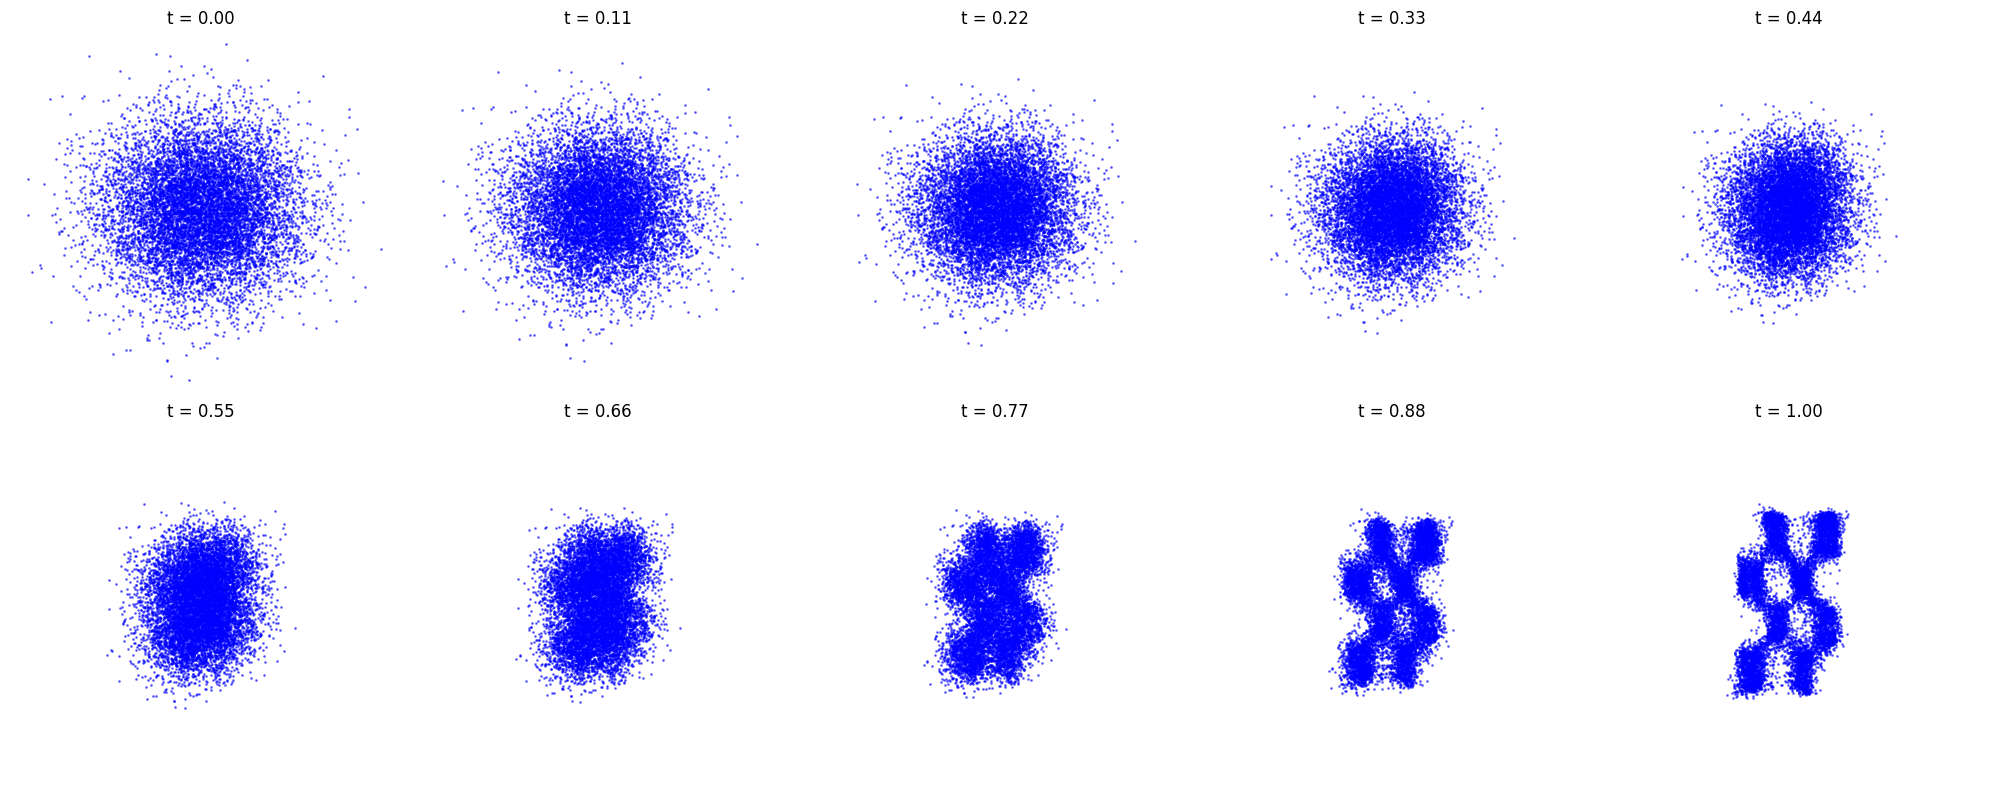

In [5]:
N_SAMPLES = 10000
N_STEPS = 100
final_x, traj = sample(model, n_samples=N_SAMPLES, dim=2, device=device, steps=N_STEPS, y=None)

# Select 10 frames
num_frames = 10
indices = np.linspace(0, len(traj) - 1, num_frames, dtype=int)
selected_frames = [traj[i] for i in indices]

print("Plotting reconstruction steps...")

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i, ax in enumerate(axes):
    frame_idx = indices[i]
    t_val = frame_idx / N_STEPS
    data = selected_frames[i].numpy()
    ax.scatter(data[:, 0], data[:, 1], s=1, alpha=0.5, color="blue")
    ax.set_title(f"t = {t_val:.2f}")
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.axis("off")
plt.tight_layout()
plt.show()

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

class Nets(nn.Module):
    def __init__(self, hidden_dim=32):
        super().__init__()
        # taille 2 en sortie, une pour s, une pour t
        self.net = nn.Sequential(
            nn.Linear(1, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 2)
        )

    def forward(self, x):
        return self.net(x)

class RealNVP_Coupling(nn.Module):
    def __init__(self, mask, hidden_dim=32):
        super().__init__()
        self.mask = nn.Parameter(mask, requires_grad=False)
        self.st_net = Nets(hidden_dim)

    def forward(self, x):
        # on separe ce qu'on garde (masked) de ce qu'on change
        x_masked = x * self.mask

        # on passe juste la dimension active au réseau
        if self.mask[0] == 1:
          input_feature = x[:, 0].unsqueeze(1)
        else:
          input_feature = x[:, 1].unsqueeze(1)

        st = self.st_net(input_feature)
        s, t = st[:, 0].unsqueeze(1), st[:, 1].unsqueeze(1)

        s = torch.tanh(s)

        # y = x_frozen + (x_to_change * exp(s) + t)
        x_out = x_masked + (1 - self.mask) * (x * torch.exp(s) + t)

        # log det jacob -> 1D donc juste s
        log_det_J = torch.sum(s, dim=1)

        return x_out, log_det_J

    def inverse(self, z):
        z_masked = z * self.mask
        if self.mask[0] == 1:
          input_feature = z[:, 0].unsqueeze(1)
        else:
          input_feature = z[:, 1].unsqueeze(1)

        st = self.st_net(input_feature)
        s, t = st[:, 0].unsqueeze(1), st[:, 1].unsqueeze(1)
        s = torch.tanh(s)

        # x = (y - t) * exp(-s)
        z_out = z_masked + (1 - self.mask) * ((z - t) * torch.exp(-s))
        return z_out

class RealNVP(nn.Module):
    def __init__(self):
        super().__init__()
        # 6 fois donc on a 3 vrais blocs
        self.layers = nn.ModuleList([
            RealNVP_Coupling(torch.tensor([1., 0.]), hidden_dim=64),
            RealNVP_Coupling(torch.tensor([0., 1.]), hidden_dim=64),
            RealNVP_Coupling(torch.tensor([1., 0.]), hidden_dim=64),
            RealNVP_Coupling(torch.tensor([0., 1.]), hidden_dim=64),
            RealNVP_Coupling(torch.tensor([1., 0.]), hidden_dim=64),
            RealNVP_Coupling(torch.tensor([0., 1.]), hidden_dim=64),
        ])

    def forward(self, x):
        log_det_sum = 0
        for layer in self.layers:
            x, log_det = layer(x)
            log_det_sum += log_det
        return x, log_det_sum

    def sample(self, num_samples, device):
        # echantillonner depuis la prior
        z = torch.randn(num_samples, 2).to(device)
        for layer in reversed(self.layers):
            z = layer.inverse(z)
        return z

In [7]:
device = torch.device("mps" if torch.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
RNVP_model = RealNVP()
RNVP_optimizer = optim.Adam(RNVP_model.parameters(), lr=1e-3)

RNVP_model.to(device)
RNVP_model.train()
print(f"Training RNVP model...")
loss_history = []

for epoch in range(EPOCHS):
    total_loss = 0
    dataset = tqdm(
        dataloader, desc=f"Epoch {epoch+1}/{EPOCHS}"
    )
    for batch in dataset:
        data = batch[0].to(device)
        RNVP_optimizer.zero_grad()

        # Forward pass : x -> z
        z, log_det = RNVP_model(data)

        # Loss: Negative Log-Likelihood
        # NLL = - (log p_z(z) + log |det J|)
        # p_z is standard normal: log p_z = -0.5 * z^2 - const
        prior_ll = -0.5 * torch.sum(z**2, dim=1)

        # Mean NLL over the batch
        loss = -torch.mean(prior_ll + log_det)

        loss.backward()
        RNVP_optimizer.step()

        loss_history.append(loss.item())

torch.save(RNVP_model.state_dict(), "demo_RNVP_model.pth")

Training RNVP model...


Epoch 1000/1000: 100%|██████████| 79/79 [00:01<00:00, 55.95it/s]


In [ ]:
# RNVP_model = torch.load("demo_RNVP_model_1000.pth")

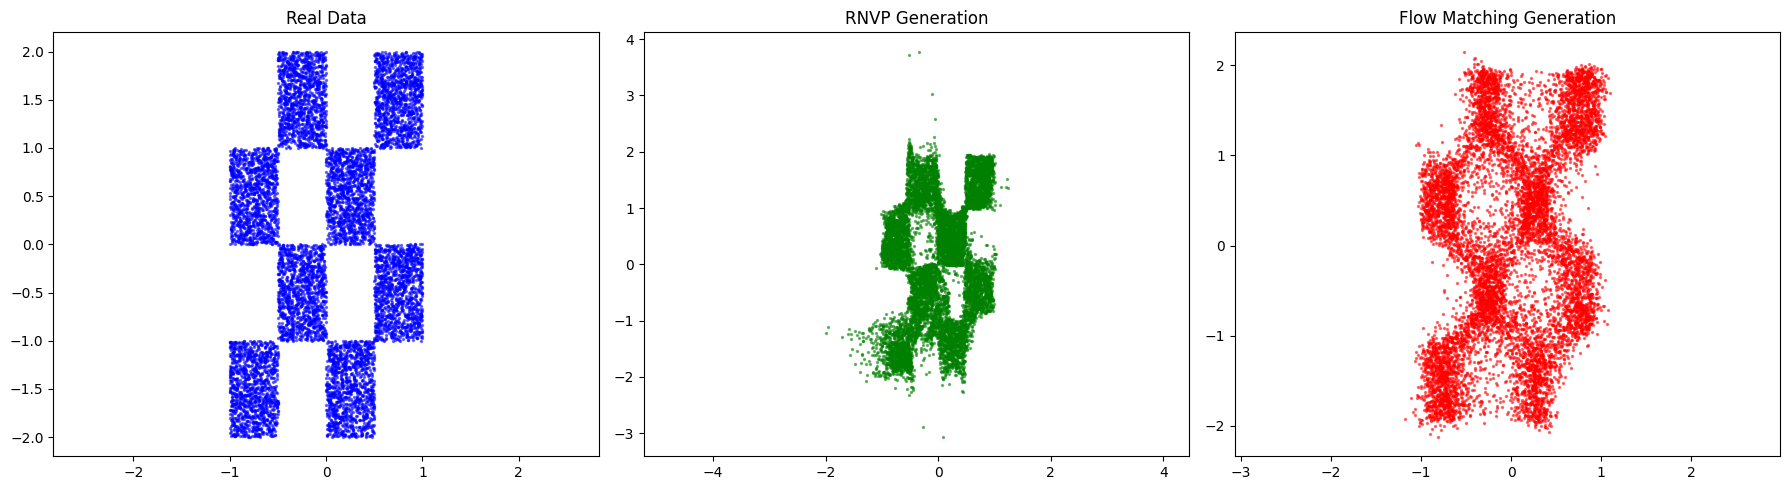

In [15]:
N_SAMPLES = 10000

with torch.no_grad():
    # 1. Generation (Inverse Flow)
    RNVP_samples = RNVP_model.sample(N_SAMPLES, device).detach().cpu().numpy()

N_STEPS = 10
final_x, traj = sample(model, n_samples=N_SAMPLES, dim=2, device=device, steps=N_STEPS, y=None)

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))


dataset = get_checkerboard()
data = dataset.tensors[0].numpy()

# Real Data
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], s=2, alpha=0.5, c='blue')
plt.title("Real Data")
plt.axis('equal')

# RNVP Generation
plt.subplot(1, 3, 2)
plt.scatter(RNVP_samples[:, 0], RNVP_samples[:, 1], s=2, alpha=0.5, c='green')
plt.title("RNVP Generation")
plt.axis('equal')

# Flow Matching Generation
plt.subplot(1, 3, 3)
fm_samples = final_x.cpu().numpy()
plt.scatter(fm_samples[:, 0], fm_samples[:, 1], s=2, alpha=0.5, c='red')
plt.title("Flow Matching Generation")
plt.axis('equal')

plt.tight_layout()
plt.show()

## CIFAR10 Data example

Classes : airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks

In [66]:
! MPLBACKEND=macosx uv run src/scripts/plot.py --data CIFAR10 --n_samples 16 --class_label 1 --model_path checkpoint_model_CIFAR10.pt

Setting up plotting for CIFAR10...
Using device: mps
Model loaded from ./checkpoints/checkpoint_model_CIFAR10.pt
Generating samples...
Generating samples for class 1...
Plotting reconstruction steps...
Plot saved to reconstruction_CIFAR10_.png
